# Spatial and temporal distribution of the invasive \*Gracilaria

vermiculophylla\* through remote sensing at its first described European site

Simon Oiry¹ [](https://orcid.org/0000-0001-7161-5246) (, Institut des Substances et Organismes de la Mer, ISOMer, , , )  
Bede Ffinian Rowe Davies¹ [](https://orcid.org/0000-0001-6462-4347) ()  
Pierre Gernez¹ [](https://orcid.org/0000-0003-2055-410X) ()  
Laurent Barillé¹ [](https://orcid.org/0000-0001-5138-2684) ()  
December 18, 2024

To be Written

[1]

[1] Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France

In [ ]:
library(tidyverse)
library(terra)
library(rnaturalearth) 
library(rnaturalearthdata) 
library(sf)
library(Utilities.Package)
library(flextable)


Attachement du package : 'flextable'

Les objets suivants sont masqués depuis 'package:terra':

    align, colorize, rotate, width

L'objet suivant est masqué depuis 'package:purrr':

    compose

In [ ]:
my_comma<-scales::label_comma(accuracy = NULL, big.mark = ",",decimal.mark = ".")

In [ ]:
library(fs)

# Define the size threshold in bytes (100 MB)
size_threshold <- 100 * 1024 * 1024

# Get a list of all files in the repository
files <- dir_ls(recurse = TRUE, type = "file")

# Filter files larger than the size threshold
large_files <- files[file_info(files)$size > size_threshold]

# Check if there are large files
if (length(large_files) > 0) {
  # Read the existing .gitignore file if it exists
  gitignore_path <- ".gitignore"
  gitignore_content <- if (file_exists(gitignore_path)) {
    readLines(gitignore_path)
  } else {
    character(0)
  }
  
  # Identify files not already in .gitignore
  files_to_add <- large_files[!large_files %in% gitignore_content]
  
  # Append new large files to .gitignore
  if (length(files_to_add) > 0) {
    writeLines(c(gitignore_content, files_to_add), gitignore_path)
    message(length(files_to_add), " file(s) added to .gitignore.")
  } else {
    message("No new files to add to .gitignore.")
  }
} else {
  message("No files larger than 100 MB found.")
}

# Title proposition

-   Remote Sensing of *Gracilaria vermiculophylla* in the site of its First European Observation

-   Monitoring the marine invasive alien species *Gracilaria vermiculophylla* using unmanned aerial vehicles

-   Remote Sensing of *Gracilaria vermiculophylla*: Mapping its Distribution at the Site of its First European Description

-   Mapping the Spread of the Invasive Species *Gracilaria vermiculophylla* using Remote Sensing at the Site of its Initial Description in Europe

-   Quantifying *Gracilaria vermiculophylla* Spatial and Temporal Distribution Through Remote Sensing at its First Recorded European Site

# Introduction

The introduction of Non-Indigenous Species (NIS) in terrestrial, freshwater, and marine ecosystems is one of the major threats to biodiversity worldwide. In particular, the proliferation and rapid spread of Invasive Alien Species (IAS) can radically change the structure and functioning of marine ecosystems, , requiring effective inventorying and monitoring programs \[@d15020161\]. In Europe, 874 NIS have been introduced to the marine environment so far (i.e. until 2020) and it is expected that the rate of biological invasions will continue to increase in the coming years \[@d14121077\]. Macroalgae represent more than 40 % of the NIS introduced to Europe waters, with many species native to the Temperate Northern Pacific \[@williams2007global\]. Amongst all invasive macroalgae, *Gracilaria vermiculophylla* \[@WoRMS303450\] (original name *Gracilariopsis vermiculophylla* \[@ohmi1956contributions\]; also known as *Agarophyton vermiculophyllum* \[@gurgel2018systematics\]), has spread extensively from its native distribution range in Japan and Korea \[@terada2002review\] across temperate estuaries in North America, Europe, and other regions, facilitated by aquaculture and maritime activities \[@rueness2005life; @weinberger2008invasive; @krueger2017genetic\]. While *G. vermiculophylla* can provide some ecosystem services, such as habitat for invertebrates and juvenile fish \[@davoult2017multiple\], it often outcompetes native vegetation, alters sediment composition \[@nyberg2009flora\], and disrupts trophic interactions \[@van2018global\]. In regions like the Baltic Sea and the eastern United States, it has been documented to negatively affect native fucoids and seagrasses \[@van2003reintroduction; @thomsen2013effects; @firth2024invasive\]. These impacts underscore the importance of monitoring and managing the spread of *G. vermiculophylla*, particularly as climate change and anthropogenic pressures continue to facilitate biological invasions. *G. vermiculophylla* success as an invader stems from its tolerance to a wide range of environmental conditions, including temperature \[@sotka2018combining\], nutrient variability \[@abreu2011nitrogen\] and salinity \[@weinberger2008invasive\]. Its growth capacity at low salinities \[@rueness2005life; @nyberg2007introduced\] explains its presence in the brackish waters of the Baltic Sea \[@weinberger2008invasive\] but also in the mesohaline sheltered part of estuaries of the Atlantic coast of Europe **(Surget et al., 2017)**. It is also present in confined areas of lagoons characterized by low hydrodynamism \[@abreu2011nitrogen; @sfriso2012spreading\]. In Europe, it was first observed in 1996 in the Belon estuary (France) and later in many other estuaries on the Brittany coast of France \[@rueness2005life\]. It can be found on hard substrates such as invertebrate’s tubes and shells providing a substratum \[@thomsen2007gracilaria\] or attached to pebbles and rocks \[@terada2002review\] but the largest populations are colonizing soft-bottom sediment and particularly estuarine intertidal mudflats **(Surget et al., 2017)**. In this habitat, extensive dark red mats are observed at low tide, covering vast areas that have largely been unquantified in most studies. Therefore, *G. vermiculophylla* can establish populations in soft-bottom sediment habitats, previously devoid of macroalgae \[@ramus2017invasive\]. These mats are usually monospecific, with the alga thalli partially buried in the mud \[@rueness2005life; @surget2017processus\]. Intertidal mats can, however, be temporarily overgrown by ephemeral green macroalgae \[@weinberger2008invasive\]. In the European estuaries where *G. vermiculophylla* was first documented, large monospecific mats were reported to be confined to the upper intertidal zones \[@rueness2005life\]; however, their spatial distribution relative to the mudflat topography and elevation had not been quantitatively assessed. In coastal lagoons of the East Atlantic coast, @besterman2020impact have shown that the mudflat topography was a significant predictor of its abundance. In fact, *G. vermiculophylla* has never been mapped using remote sensing techniques, and existing descriptions of its distribution lack spatially explicit mapping \[@thomsen2007gracilaria; @weinberger2008invasive; @abreu2011nitrogen; @sfriso2012spreading\].

Remote sensing has revolutionized our ability to monitor and manage coastal ecosystems, offering efficient and scalable methods for detecting environmental changes in intertidal vegetation across a wide range of spatio-temporal scales \[@davies2024intertidal; @calleja2017long; @davies2024sentinel; @zoffoli2021decadal; @valle2015mapping\]. Among remote-sensing technologies, drone-based imagery has recently emerged as a particularly promising tool for studying the spatial distribution of intertidal primary producers such as benthic microalgae \[@roman2021using; @roman2024mapping\], seagrass \[@chand2021low; @duffy2018spatial; @roman2021using\] and macroalgae \[@rs14133124; @peidro2024quantifying\]. While it lacks the temporal consistency of satellite missions, drone remote sensing makes it possible to acquire at extremely high spatial resolution (i.e. cm-scale), rapidly target specific areas of interest, and provide observations in overcast conditions. In particular, the potential of drone remote sensing for monitoring the surface area occupied by IAS has been demonstrated \[@roca2022monitoring\]. Drone-based photogrammetry also makes it possible to characterize the distribution of intertidal vegetation together with mudflat geomorphology, thus improving our understanding of primary producers patterning \[@brunier2022evolution; @douglas2024linking\].

This study applied a drone-based remote sensing approach to map *G. vermiculophylla* spatial distribution at a very-high spatial resolution in intertidal estuaries of European Atlantic coast. We adapted a neural network classification model, DISCOV (Drone Intertidal Substrate Classification Of Vegetation, @rs16234383) by training the model with new training pixels of *G. vermiculophylla*. An *in situ* data validation dataset was obtained to estimate the classification accuracy. LIDAR data were concurrently acquired to map the intertidal elevation accurately. A Generalized Additive Model (GAM) was used to examine the relationship between the seaweed spatial distribution and spatial metrics quantifying the mudflat topography. We expected the presence of *G. vermiculophylla* in mudflats to be associated to a specific height range as well as being more closely related with flat areas of the intertidal zone. In the Belon estuary (South Brittany, France) where it was first observed in Europe, a time series, starting from 1952, of RGB images was analysed to describe the temporal changes of its distribution over the last seventy years.

# Materiel & Methods

In [ ]:
building <- T   

layout<-"Data/Workflow_Figure" %>%
  list.files("V2.txt",full.names = T, recursive = T) %>%
  read_delim(delim = "\t", escape_double = FALSE,
    trim_ws = TRUE) %>%
  dplyr::filter(Evaluate == T)


layout$Text<- gsub("alaligne","\n", layout$Text)

boxes<- layout %>% 
  dplyr::filter(Type == "Box",
                shape == "square")


text<- layout %>% 
  dplyr::filter(Type == "Box")

diamonds<- layout %>% 
  dplyr::filter(Type == "Box",
                shape == "diamond")
diff = 0.1
for (i in 1:nrow(diamonds)) {
  diam_a<-diamonds[i,]
  
df<-data.frame(  
  x = c(diam_a$xmin - diff, diam_a$xmin + diff, diam_a$xmax + diff, diam_a$xmax - diff),
  y = c(diam_a$ymin, diam_a$ymax, diam_a$ymax, diam_a$ymin),
  Type = rep(diam_a$Type,4),
  Text = rep(diam_a$Text,4),
  Color = rep(diam_a$color,4),
  Evaluate = rep(diam_a$Evaluate,4),
  Resolution =  rep(diam_a$Resolution,4),
  Evaluate_bigbox = rep(diam_a$Evaluate_bigbox,4),
  alpha = rep(diam_a$alpha,4),
  shape =  rep(diam_a$shape,4)
)
  if(i == 1){
    diamond_list<-list(df)
  }else{
    diamond_list[[i]]<-df
  }
}



Arrows<- layout %>% 
  dplyr::filter(Type == "Arrow",
                Evaluate == T)

Group_box<-layout %>% 
  dplyr::filter(Type == "Box",
                Evaluate_bigbox == T) %>% 
  group_by(Group) %>% 
  dplyr::summarise(xmin = min(xmin)-0.1,
                   xmax = max(xmax)+0.1,
                   ymin = min(ymin)-0.1,
                   ymax = max(ymax)+0.1,
                   alpha = 0.1,
                   color = color)

resolution_box<-layout %>% 
  dplyr::filter(Type == "Box",
                Resolution != "NA") %>% 
  group_by(Resolution) %>% 
  dplyr::summarise(xmin = min(xmin)-0.1,
                   xmax = max(xmax)+0.1,
                   ymin = min(ymin)-0.1,
                   ymax = max(ymax)+0.1,
                   alpha = 0.1,
                   color = color)

legend = data.frame(color = unique(layout$color)) %>% 
  dplyr::filter(!is.na(color)) %>% 
  mutate(label = case_when(color == "#EA6155" ~ "Input Data",
                           color == "#DC9614" ~ "Pre-processing",
                           color == "#52A4DA" ~ "Model Building",
                           color == "#79DA52" ~ "Validation",
                           color == "#DA9652" ~ "Output Data",
                           color == "darkcyan" ~ "Final Product",
                           color == "#DA5273"  ~ "Prediction",
                           TRUE ~ "NA")) %>% 
  arrange

segment<-layout %>% 
  dplyr::filter(Type == "Segment")

if(building == T){
  
text_size = 6 #### 6 to plot it fullscreen in R,  1.8 for exporting with ggsave
line_size =1 ####arrow_size 0.3 to export  1 to for R plotting

legend_size = 1 #### 0.3 to export, 1 for R ploting
legend_text = 10 #### 4 to export, 10 for R ploting
}else{
  
text_size = 1.85 #### 6 to plot it fullscreen in R,  1.8 for exporting with ggsave
line_size =0.3 ####arrow_size 0.3 to export  1 to for R plotting

legend_size = 0.3 #### 0.3 to export, 1 for R ploting
legend_text = 5 #### 5 to export, 10 for R ploting
  
}


a<-ggplot()+
  
  # statebins:::geom_rrect(data = Group_box,
  #           mapping = aes(xmin = xmin,
  #                         xmax= xmax,
  #                         ymin = ymin,
  #                         ymax = ymax),
  #           alpha = 0.05,
  #           size = 0.2,
  #           show.legend = F,
  #           fill = Group_box$color,
  #           color = "black")+
  
    # statebins:::geom_rrect(data = resolution_box,
    #         mapping = aes(xmin = xmin,
    #                       xmax= xmax,
    #                       ymin = ymin,
    #                       ymax = ymax,
    #                       alpha = rep(c("Input Data", "Pre-processing", "Model Building", "Prediction", "Validation", "Output Data", "Final Product"),2)),
    #         fill = "NA",
    #         linetype = 2,
    #         size = 0.4,
    #         color = "black")+
  
  scale_alpha_manual(name = "", 
                     values = c(1,1,1,1,1,1,1),
                     labels = c("Input Data", "Pre-Processing", "Model Building", "Prediction", "Validation", "Output Data", "Final Product"),
                     guide = guide_legend(ncol = 1, override.aes = list(fill = c("#f94144", "#f3722c", "#f8961e", "#f9c74f", "#90be6d", "#43aa8b", "#577590"),
                                                                        shape = c(22),
                                                                        linetype = c(1),
                                                                        alpha = c(0.5)
                                                                        )
                                          )
                     )+
  
  statebins:::geom_rrect(data = boxes,
            mapping = aes(xmin = xmin,
                          xmax= xmax,
                          ymin = ymin,
                          ymax = ymax
                          ),
            size = 0.2,
            alpha = as.numeric(boxes$alpha),
            fill = boxes$color,
            color = "black")
  
  for(i in 1:length(diamond_list)){
    poly_i<-diamond_list[[i]]
    a<-a+
      geom_polygon(data = poly_i, 
                   mapping = aes(x = x, 
                                 y = y
                                 ),
                  size = 0.2,
                   alpha = poly_i$alpha,
                   fill = poly_i$Color,
                   color = "black")
    
  }

if(building == T){
    a<-a+
    geom_text(data = text,
            mapping = aes(x = (xmax+xmin)/2, y = (ymax + ymin)/2, label = (ID)), size = text_size)
  
}else{
    a<-a+
    geom_text(data = text,
            mapping = aes(x = (xmax+xmin)/2, y = (ymax + ymin)/2, label = (Text)), size = text_size)
}


  a<-a+
    geom_segment(data = Arrows, aes( x = xmin, xend = xmax, y = ymin, yend = ymax),
    size=line_size, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed")
    )+
    geom_segment(data = segment, aes( x = xmin, xend = xmax, y = ymin, yend = ymax),
    size=line_size, linejoin = "mitre", lineend = "square"
    )
    
  if(building == F){
  a<- a+ theme_void()
  }
  
  a<-a+
  theme(legend.position = c(0.88,0.3),
        legend.text = element_text(size = legend_text),
        legend.key.size = unit(legend_size, 'cm'),
        plot.background = element_rect(fill = "white",color = NA)
        )+
  scale_x_continuous(breaks = scales::breaks_width(0.5))+
  scale_y_continuous(breaks = scales::breaks_width(0.5))
  
if(building == T){
a
}else{
  ggsave("Paper/Figures/Workflow.png",a, units = "px")
}

## Study sites

Field campaigns were conducted at three study sites in France and Spain. At each site, two locations were investigated \[@fig-location_sites\]. The Aven & Belon Estuary in South Brittany, France (@fig-location_sites A & C), is a dynamic ria-type system hosting diverse habitats, including sandy tidal flats and subtidal zones with coarse, marine-origin sediments \[@Michel2021; @Castaing1995\]. These habitats support key benthic species such as *Scrobicularia plana*, *Cerastoderma edule*, and *Tellina tenuis*, which play essential roles in sediment bioturbation and nutrient cycling \[@Tankoua2011; @Blanchet2014\]. The estuary serves as a nursery for juvenile fish and a feeding ground for migratory birds, with its ecological productivity driven by a mix of euryhaline and marine species adapted to salinity gradients \[@Blanchet2014\]. Oyster farming, particularly *Crassostrea gigas*, is a dominant activity, altering sediment dynamics and local biodiversity \[@Michel2021\]. Despite its ecological richness, the estuary faces pressures from nutrient loading and physical alterations, with bioindicators like *S. plana* used to monitor the impacts of salinity, sediment quality, and pollution \[@Tankoua2011\].

In [ ]:
"The Ria d'Étel, located in Brittany, France, is a macrotidal estuary characterized by its unique hydrodynamics and biodiversity (@fig-location_sites B). Influenced predominantly by tidal regimes, the estuary exhibits high-energy zones with strong currents reaching up to 2.5 m/s, shaping both sediment deposition and ecological habitats [@Portas2023]. The estuary supports diverse benthic communities, with sedimentary organic matter originating from both terrestrial inputs and marine sources, contributing to nutrient cycling and benthic fluxes [@Jeanneau2023]. Vegetation gradients transition from halophytic plants in saline zones to freshwater species upstream, reflecting the estuary's salinity dynamics and ecological complexity [@Cianfaglione2018]. This estuary is also notable for its shellfish farming, with species like *Crassostrea gigas* cultivated extensively. The presence of filter-feeding organisms such as sponges (*Hymeniacidon perlevis*) enhances water quality by mitigating bacterial loads and promoting bioremediation [@Gentric2024]. However, the estuary faces environmental pressures, including nutrient enrichment from agricultural runoff and anthropogenic impacts on sedimentary processes.
"

The Saja-Besaya Estuary, situated along the Cantabrian Sea in northern Spain, is characterized by the confluence of the Saja and Besaya rivers near Torrelavega (@fig-location_sites C). The estuary, also known as San Martín de la Arena or Suances Estuary, has been subject to significant anthropogenic pressures, including industrial developments throughout the 20th century. These activities have led to contamination from mining, paper manufacturing, and carbonate discharges, classifying the estuary as highly polluted near its upper reaches \[@ortega2005fluxes\]. This contamination impacts the estuarine ecosystem, including water quality and biodiversity, with minimal aquatic life and sparse riverbank vegetation in its lower sections \[@romero2008sintering\].

In [ ]:
######### Aven Belon 

mask_aven_belon <- read_sf("Data/shp/mask/mask_site_Aven_Belon_32630.shp")

HT <-  list.files("Data/Sentinel2/Aven_Belon/S2A_MSIL2A_20231107T111251_N0509_R137_T30TVT_20231107T144858.SAFE/GRANULE/L2A_T30TVT_A043749_20231107T111246/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_aven_belon, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_aven_belon, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)


LT <-  list.files("Data/Sentinel2/Aven_Belon/S2A_MSIL2A_20240624T110641_N0510_R137_T30TVT_20240624T153247.SAFE/GRANULE/L2A_T30TVT_A047038_20240624T111001/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_aven_belon, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_aven_belon, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Aven_Belon <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Aven_Belon)[values(intertidal_Aven_Belon) == F] <- NA

mask_sf <- as.polygons(intertidal_Aven_Belon) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp")


Land_Aven_Belon <- NDVI_LT > 0.05 & NDVI_HT > 0.05


values(Land_Aven_Belon)[values(Land_Aven_Belon) == F] <- NA

mask_sf <- as.polygons(Land_Aven_Belon) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes()
  # smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp")



######### ETEL

mask_Etel <- read_sf("Data/shp/mask/mask_site_Etel_32630.shp")

HT <-  list.files("Data/Sentinel2/Etel/S2A_MSIL2A_20231008T110941_N0509_R137_T30TVT_20231008T171550.SAFE/GRANULE/L2A_T30TVT_A043320_20231008T111641/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_Etel, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_Etel, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)

LT <-  list.files("Data/Sentinel2/Etel/S2B_MSIL2A_20230718T112119_N0509_R037_T30TVT_20230718T124824.SAFE/GRANULE/L2A_T30TVT_A033239_20230718T112118/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_Etel, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_Etel, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Etel <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Etel)[values(intertidal_Etel) == F] <- NA

mask_sf <- as.polygons(intertidal_Etel) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Etel.shp")


Land_Etel <- NDVI_LT > 0.05 & NDVI_HT > 0.05


values(Land_Etel)[values(Land_Etel) == F] <- NA

mask_sf <- as.polygons(Land_Etel) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() 
  
plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Etel.shp")

######### SAJA

mask_SAJA <- read_sf("Data/shp/mask/mask_site_Saja_32630.shp")


HT <-  list.files("Data/Sentinel2/Saja/S2A_MSIL2A_20181004T110911_N0500_R137_T30TVP_20230620T014212.SAFE/GRANULE/L2A_T30TVP_A017151_20181004T111207/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_SAJA, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_SAJA, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)


LT <-  list.files("Data/Sentinel2/Saja/S2A_MSIL2A_20230928T110831_N0509_R137_T30TVP_20230928T171657.SAFE/GRANULE/L2A_T30TVP_A043177_20230928T111532/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_SAJA, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_SAJA, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Saja <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Saja)[values(intertidal_Saja) == F] <- NA

mask_sf <- as.polygons(intertidal_Saja) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Saja.shp")


Land_Saja <- NDVI_LT > 0.05 & NDVI_HT > 0.05

values(Land_Saja)[values(Land_Saja) == F] <- NA

mask_sf <- as.polygons(Land_Saja) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Saja.shp")

In [ ]:
sovereignty10 <- ne_countries(scale = 10, returnclass = "sf")

world_map <- sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(sovereignt%in%c("Spain","France","Portugal",
                                "Italy","Andorra",
                                "United Kingdom",
                                "Switzerland","Belgium",
                                "Germany","Luxembourg") ) 

bbox_europe <- st_bbox(c(xmin = -20, ymin = 34,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(world_map) ) 

world_map<-st_make_valid(world_map) 

european_union_map_cropped <- st_crop(world_map, bbox_europe)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  


UnitedKingdom<-sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(sovereignt%in%c("United Kingdom") ) %>% 
  st_cast("POLYGON") 

bbox_UK <- st_bbox(c(xmin = -20, ymin = 45,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(UnitedKingdom) ) 

UnitedKingdom<-st_make_valid(UnitedKingdom) 

UK_map_cropped <- st_crop(UnitedKingdom, bbox_UK)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ") 

Europe_sf<-european_union_map_cropped %>% 
  dplyr::bind_rows(UK_map_cropped) 


Projects<-data.frame(
  Name=c(
  "France - Aven",
  "France - Belon",
  "Spain - Saja Estuary"
  ) ,
  Long=c(-3.187818,
         -3.187818, 
         -4.025402) ,
  Lat=c(47.697566, 
        47.697566,
        43.408356) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

Projects_df<-Projects %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

Miniworld_map <- sovereignty10 %>% 
  st_as_sf()

sf_use_s2(FALSE)

bbox_EU <- st_bbox(c(xmin = -30, ymin = 20,
                         xmax = 50, ymax = 70) ,
                       crs = st_crs(Miniworld_map) ) 

  MiniEU_map<-st_crop(Miniworld_map, bbox_EU)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

  df_P1<-Projects_df %>% 
    mutate(ID = c(1:nrow(.))) %>% 
    mutate(Site = case_when(ID == 1 ~ "Aven Estuary",
                            ID == 2 ~ "Bélon Estuary",
                            ID == 3 ~ "Saja Estuary",
                            TRUE ~ "NA"),
           ID = case_when(ID == 1 ~ "A",
                          ID == 2 ~ "B",
                          TRUE ~ "C"),
           lon_label = 2900000,
           lat_label = case_when(Site == "Aven Estuary" ~ lat  - 200000,
                                 Site == "Bélon Estuary" ~ lat + 50000,
                                 Site == "Saja Estuary" ~ lat  - 250000,),
           lat_ID = lat_label + 100000) %>% 
    dplyr::select(c(lon,lat,lon_label,lat_label,lat_ID,ID,Site))
    
    scaleFUN <- function(x) paste0(sprintf("%.2f", x),"°N")
(
p1 <- ggplot(MiniEU_map) +
  geom_sf(linewidth = 0.5, alpha = 0.93, fill = "#CFCFCF", colour = "grey30") +
  geom_segment(data = df_P1, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = ID), color = "goldenrod4",size = 1)+
  geom_point(data = df_P1, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = df_P1, aes(x = lon_label, y =lat_label, label = Site), fill = "#FFD27D",size = 5)+
  geom_label(data = df_P1, aes(x = lon_label, y = lat_ID, label = c("B","A","C")), size = 6)+
  coord_sf(
    xlim = c(2600000, 4100000),
    ylim = c(1600000, 3100000), 
    expand = FALSE
  ) +
  theme_Bede_Map() +
  labs(x = "Longitude", y = "Latitude") +
  scale_x_continuous(breaks = 0) +
  scale_y_continuous(breaks = 42, labels = scaleFUN) +
  # theme_void() +
  theme(
    plot.margin = unit(c(0, 0, 0, 0), "cm"),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_text(size = 20, vjust = 7.1, hjust = 0.8),
    axis.text.y = element_text(size = 20, vjust = -5, hjust = 0, angle = 90),
    # panel.border = element_rect(color = "black", fill = NA),
    # panel.background = element_rect(fill = "white"),
    # plot.background = element_rect(fill = "white", color = NA),
    # legend.background = element_rect(fill = "transparent"),
    # panel.grid.major = element_line(color = "grey", linetype = "dashed", linewidth = 0.5),
    # panel.grid.minor = element_line(color = "grey", linetype = "dotted", linewidth = 0.25)
  ))



ggsave("Paper/Figures/High_res/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10, dpi = 200) 

In [ ]:
create_square_sf <- function(side_length, center_lonlat) {
  # Validate input
  if (length(center_lonlat) != 2) {
    stop("Please provide the center coordinates as a vector: c(longitude, latitude).")
  }
  if (!is.numeric(side_length) || side_length <= 0) {
    stop("Please provide a positive numeric value for the side length.")
  }
  
  # Define the center point in lon/lat
  center_point <- st_sfc(st_point(center_lonlat), crs = 4326)
  
  # Transform to EPSG:32630
  center_point_utm <- st_transform(center_point, 32630)
  center_coords <- st_coordinates(center_point_utm)
  
  # Calculate half side length in meters
  half_side <- side_length / 2
  
  # Create the square corners in UTM
  square_coords <- matrix(c(
    center_coords[1] - half_side, center_coords[2] - half_side,
    center_coords[1] + half_side, center_coords[2] - half_side,
    center_coords[1] + half_side, center_coords[2] + half_side,
    center_coords[1] - half_side, center_coords[2] + half_side,
    center_coords[1] - half_side, center_coords[2] - half_side # Close the square
  ), ncol = 2, byrow = TRUE)
  
  # Create a polygon from the coordinates
  square_polygon <- st_polygon(list(square_coords))
  
  # Create an sf object
  square_sf <- st_sfc(square_polygon, crs = 32630)
  
  return(square_sf)
}

In [ ]:
It_Saja <- "Data/shp/Intertidal_sites/mask_intertidal_Saja.shp" %>% 
  read_sf()

Land_Saja <- "Data/shp/Intertidal_sites/mask_Land_Saja.shp" %>% 
  read_sf()

ext_plot_Saja <- st_bbox(create_square_sf(5000, c(-4.025987, 43.4200065)))



Flight_Saja<-data.frame(
  Name=c(
  "Marisma de \nCortiguera",
  "Marisma de \nCudón"),
  Long=c(-4.029591,
         -4.031800) ,
  Lat=c(43.409738,
        43.414434)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Marisma de \nCudón" ~ 418639.3,
                               Name == "Marisma de \nCortiguera" ~ lon + 2000),
         lat_label = case_when(Name == "Marisma de \nCudón" ~ lat + 1000,
                               Name == "Marisma de \nCortiguera" ~ lat + 500))

(plot_Saja <- ggplot() +
  geom_sf(data = Land_Saja, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_Saja, linewidth = 0.05, alpha = 0.93, fill = "goldenrod")+
    geom_label(aes(x = as.numeric(ext_plot_Saja[1]) + (as.numeric(ext_plot_Saja[3])-as.numeric(ext_plot_Saja[1]))*0.1 , 
                   y = as.numeric(ext_plot_Saja[2]) + (as.numeric(ext_plot_Saja[4])-as.numeric(ext_plot_Saja[2]))*0.1
                   , label = "C"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_Saja[1], ext_plot_Saja[3]),
    ylim = c(ext_plot_Saja[2], ext_plot_Saja[4]),
    expand = F
  ) +
  geom_segment(data = Flight_Saja, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_Saja, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_Saja, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -4.01) +
  scale_y_continuous(breaks = 43.415) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 4.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -4, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank()
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_Saja.png",plot_Saja,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Saja.png",plot_Saja,width= 10, height=10, dpi = 200)  

In [ ]:
It_AB <- "Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp" %>% 
  read_sf()

Land_AB <- "Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp" %>% 
  read_sf()

ext_plot_AB <- st_bbox(create_square_sf(8000, c(-3.780146, 47.810000)))


Flight_AB<-data.frame(
  Name=c(
  "Notre-Dame De Tremor"),
  Long=c(-3.748634) ,
  Lat=c(47.837923)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Notre-Dame De Tremor" ~  as.numeric(ext_plot_AB[1]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.35),
         lat_label = case_when(Name == "Notre-Dame De Tremor" ~  as.numeric(ext_plot_AB[2]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.85))

(Plot_Aven <- ggplot() +
  geom_sf(data = Land_AB, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_AB, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_AB[1]) + (as.numeric(ext_plot_AB[3])-as.numeric(ext_plot_AB[1]))*0.1 , 
                   y = as.numeric(ext_plot_AB[2]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.1
                   , label = "A"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_AB[1], ext_plot_AB[3]),
    ylim = c(ext_plot_AB[2], ext_plot_AB[4]),
    expand = F
  ) +
  geom_segment(data = Flight_AB, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_AB, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_AB, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -3.725) +
  scale_y_continuous(breaks = 47.82) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",  # Stack legends vertically
    legend.box.just = "left",  # Align the legends to the left
    legend.spacing.y = unit(0.0, 'mm'),  # Adjust the spacing between items
    legend.key = element_rect(fill = "white", color = "black"),  # Ensure clear legend keys
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25)
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_AB.png",Plot_Aven,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_AB.png",Plot_Aven,width= 10, height=10, dpi = 200)  

In [ ]:
It_AB <- "Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp" %>% 
  read_sf()

Land_AB <- "Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp" %>% 
  read_sf()

ext_plot_B <- st_bbox(create_square_sf(8000, c(-3.690000, 47.800000)))


Flight_AB<-data.frame(
  Name=c("Pont du Guilly"),
  Long=c(-3.655220) ,
  Lat=c(47.822408)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Pont du Guilly" ~ as.numeric(ext_plot_B[1]) + (as.numeric(ext_plot_B[3])-as.numeric(ext_plot_B[1]))*0.7),
         lat_label = case_when(Name ==  "Pont du Guilly" ~  as.numeric(ext_plot_B[2]) + (as.numeric(ext_plot_B[4])-as.numeric(ext_plot_B[2]))*0.7))

(plot_Belon <- ggplot() +
  geom_sf(data = Land_AB, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_AB, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_B[1]) + (as.numeric(ext_plot_B[3])-as.numeric(ext_plot_B[1]))*0.1 , 
                   y = as.numeric(ext_plot_B[2]) + (as.numeric(ext_plot_B[4])-as.numeric(ext_plot_B[2]))*0.1
                   , label = "B"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_B[1], ext_plot_B[3]),
    ylim = c(ext_plot_B[2], ext_plot_B[4]),
    expand = F
  ) +
  geom_segment(data = Flight_AB, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_AB, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_AB, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -3.67) +
  scale_y_continuous(breaks = 47.82) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",  # Stack legends vertically
    legend.box.just = "left",  # Align the legends to the left
    legend.spacing.y = unit(0.0, 'mm'),  # Adjust the spacing between items
    legend.key = element_rect(fill = "white", color = "black"),  # Ensure clear legend keys
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25)
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_AB.png",plot_AB,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_AB.png",plot_AB,width= 10, height=10, dpi = 200)  

In [ ]:
It_Etel <- "Data/shp/Intertidal_sites/mask_intertidal_Etel.shp" %>% 
  read_sf()

Land_Etel <- "Data/shp/Intertidal_sites/mask_Land_Etel.shp" %>% 
  read_sf()



ext_plot_Etel <- st_bbox(create_square_sf(10000, c(-3.186821, 47.683477)))


Flight_Etel<-data.frame(
  Name=c(
  "Berringue",
  "Lorois"),
  Long=c(-3.194274,
         -3.205714) ,
  Lat=c(47.698978,
        47.675159)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Berringue" ~ lon - 1000,
                               Name == "Lorois" ~ lon + 2000),
         lat_label = case_when(Name ==  "Berringue" ~ lat + 1000,
                               Name == "Lorois" ~ lat - 1000))


(plot_Etel <- ggplot() +
  geom_sf(data = Land_Etel, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_Etel, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_Etel[1]) + (as.numeric(ext_plot_Etel[3])-as.numeric(ext_plot_Etel[1]))*0.1 , 
                   y = as.numeric(ext_plot_Etel[2]) + (as.numeric(ext_plot_Etel[4])-as.numeric(ext_plot_Etel[2]))*0.1
                   , label = "B"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_Etel[1], ext_plot_Etel[3]),
    ylim = c(ext_plot_Etel[2], ext_plot_Etel[4]),
    # ndiscr = 1,
    expand = FALSE
  ) +
  scale_x_continuous(breaks = -3.2) +
  scale_y_continuous(breaks = 47.68) +
  geom_segment(data = Flight_Etel, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_Etel, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_Etel, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map() +
  labs(x = "Longitude", y = "Latitude")+
  # scale_x_continuous(breaks = seq(floor(ext_plot_Etel[1]), ceiling(ext_plot_Etel[3]), by = 500)) +
  # scale_y_continuous(breaks = seq(floor(ext_plot_Etel[2]), ceiling(ext_plot_Etel[4]), by = 500)) +

  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",
    legend.box.just = "left",
    legend.spacing.y = unit(0.0, 'mm'),
    legend.key = element_rect(fill = "white", color = "black"),
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = element_line(
      linetype = "dotted",
      colour = alpha("grey30", 0.5),
      linewidth = 0.25
    )
  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_Etel.png",plot_AB,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Etel.png",plot_AB,width= 10, height=10, dpi = 200)  

In [ ]:
(final_map <- ((p1 | Plot_Aven) / (plot_Belon | plot_Saja))  + 
  plot_layout(guides = "collect")& 
    # theme_void()&
  theme(legend.position = "bottom",
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_text(size = 20, vjust = 6, hjust = 0.8),
    axis.text.y = element_text(size = 20, vjust = -5, hjust = 0, angle = 90))
)

ggsave("Paper/Figures/High_res/Figure1/Map_site.png",final_map,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_site.png",final_map,width= 10, height=10, dpi = 200)

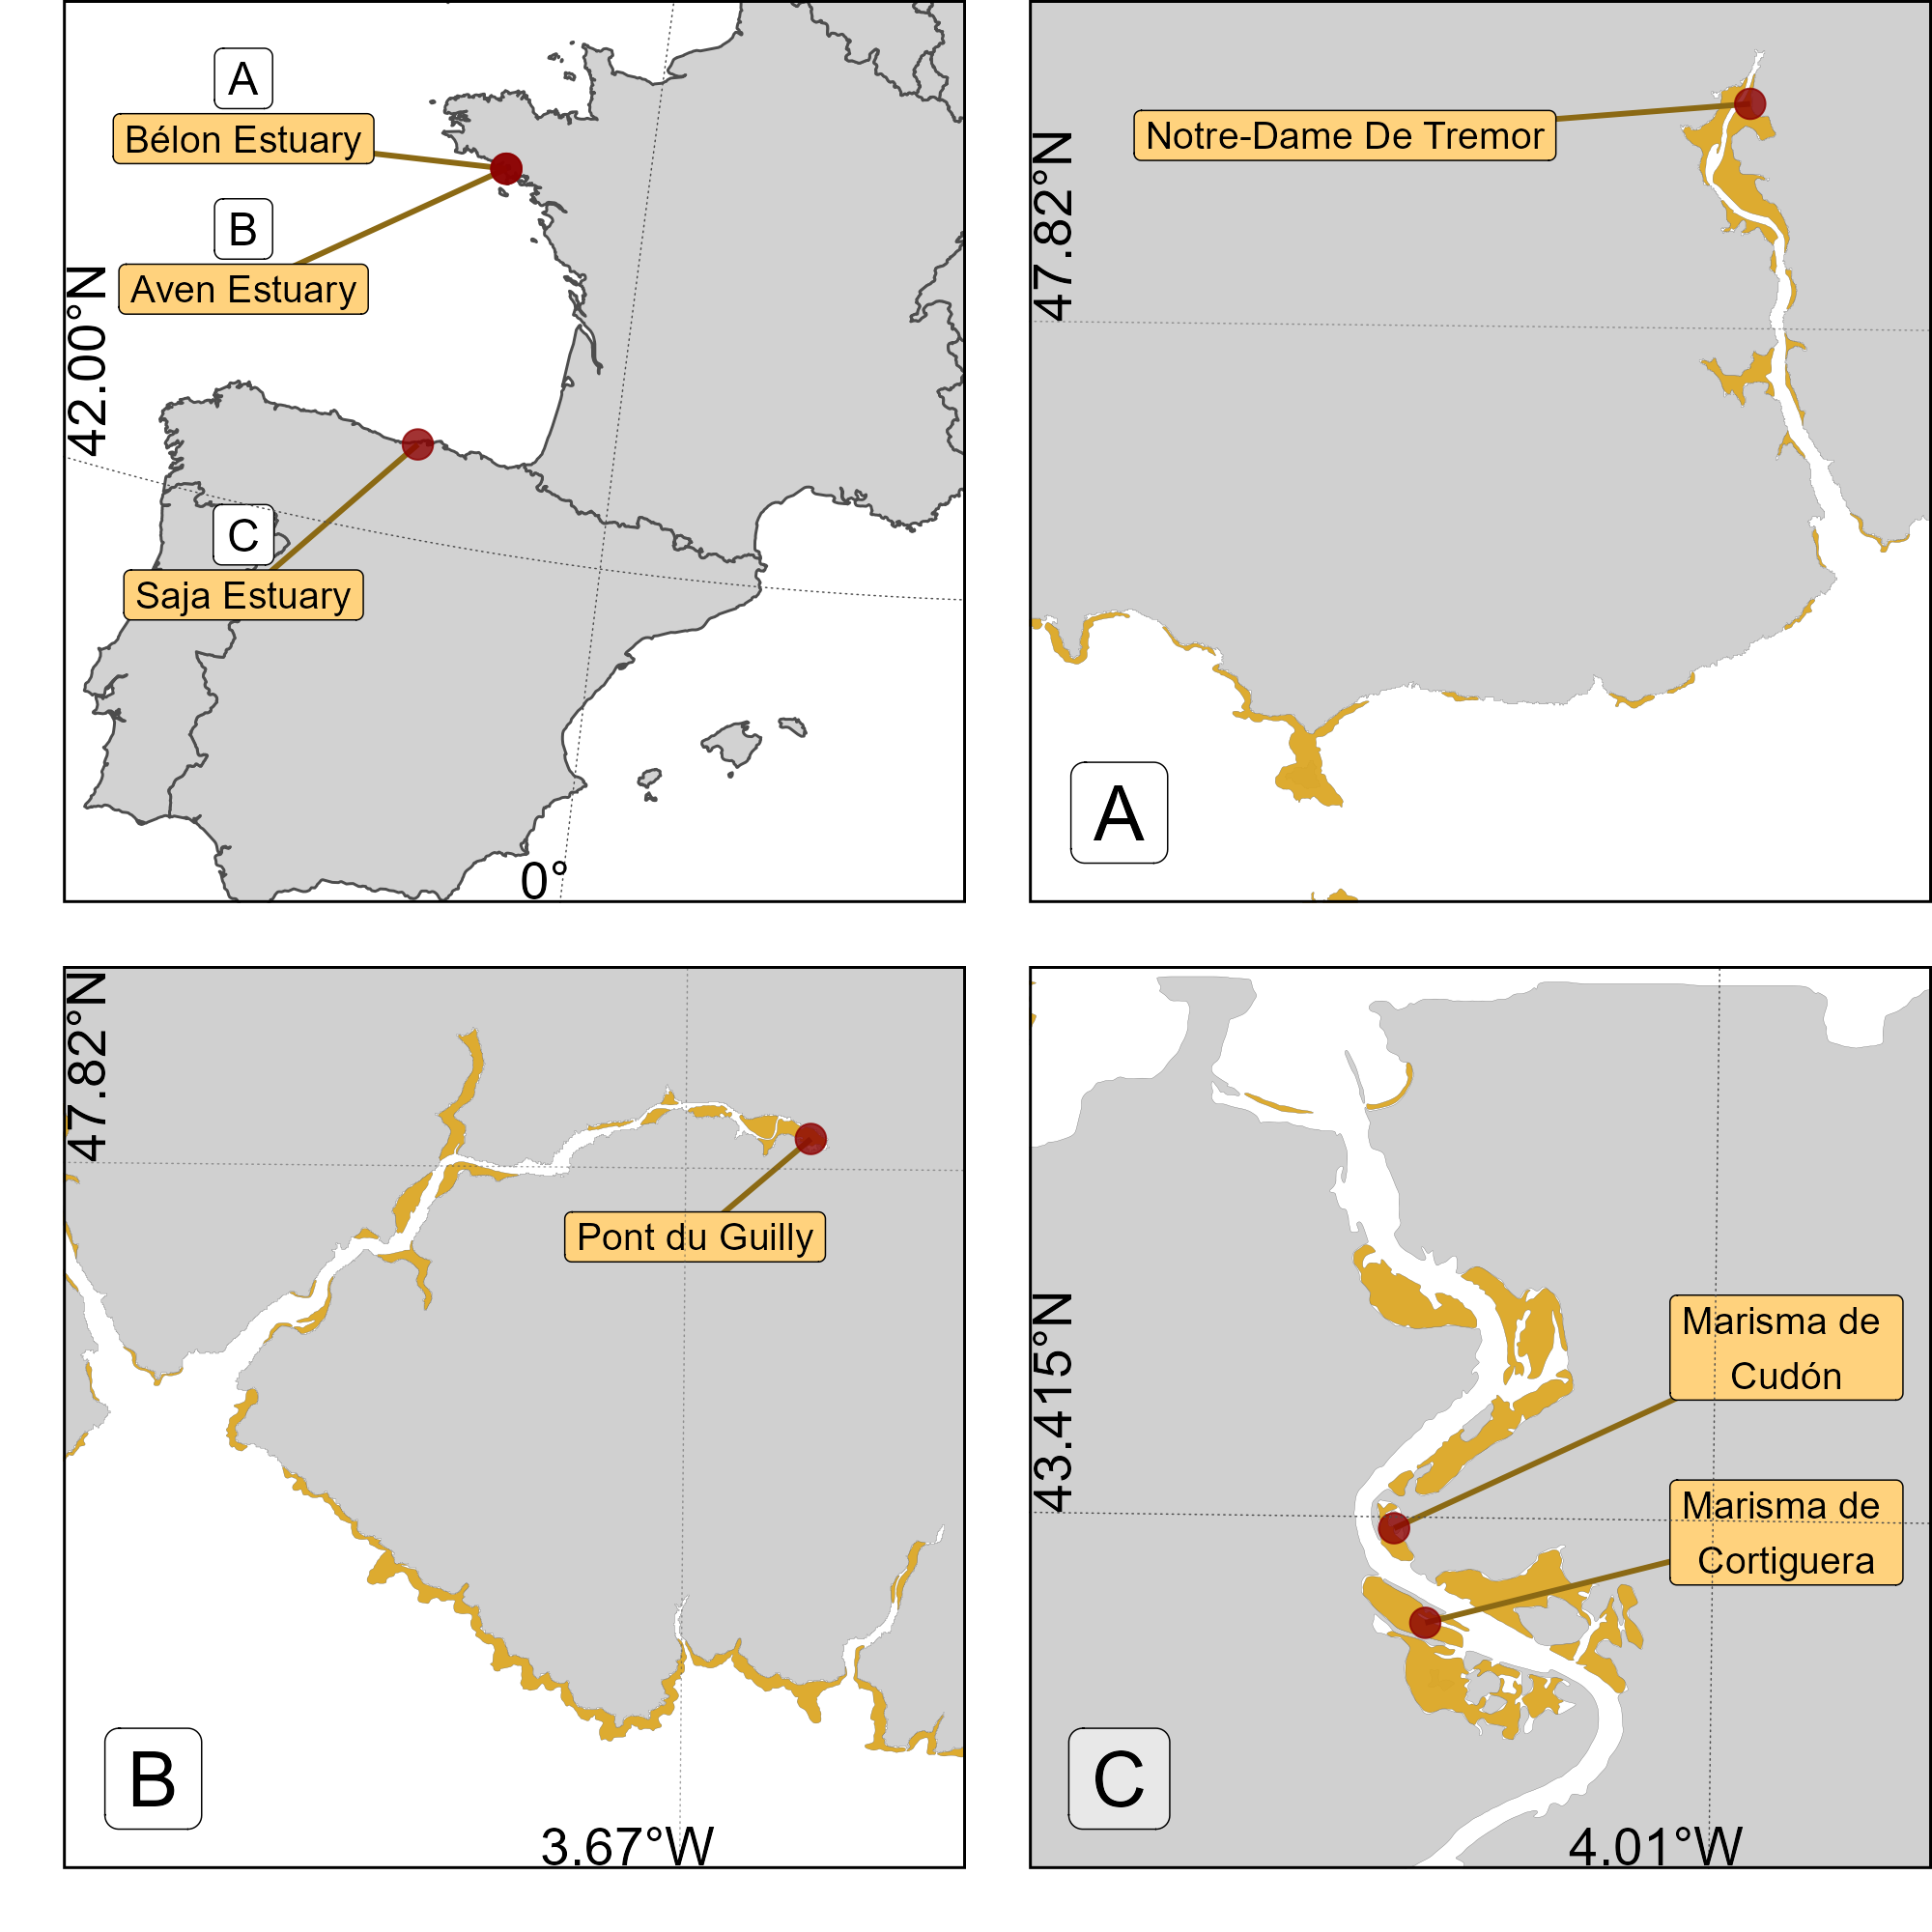

In [ ]:
knitr::include_graphics("Figures/Low_res/Figure1/Map_site.png")

## Remote sensing data acquisition and pre-processing

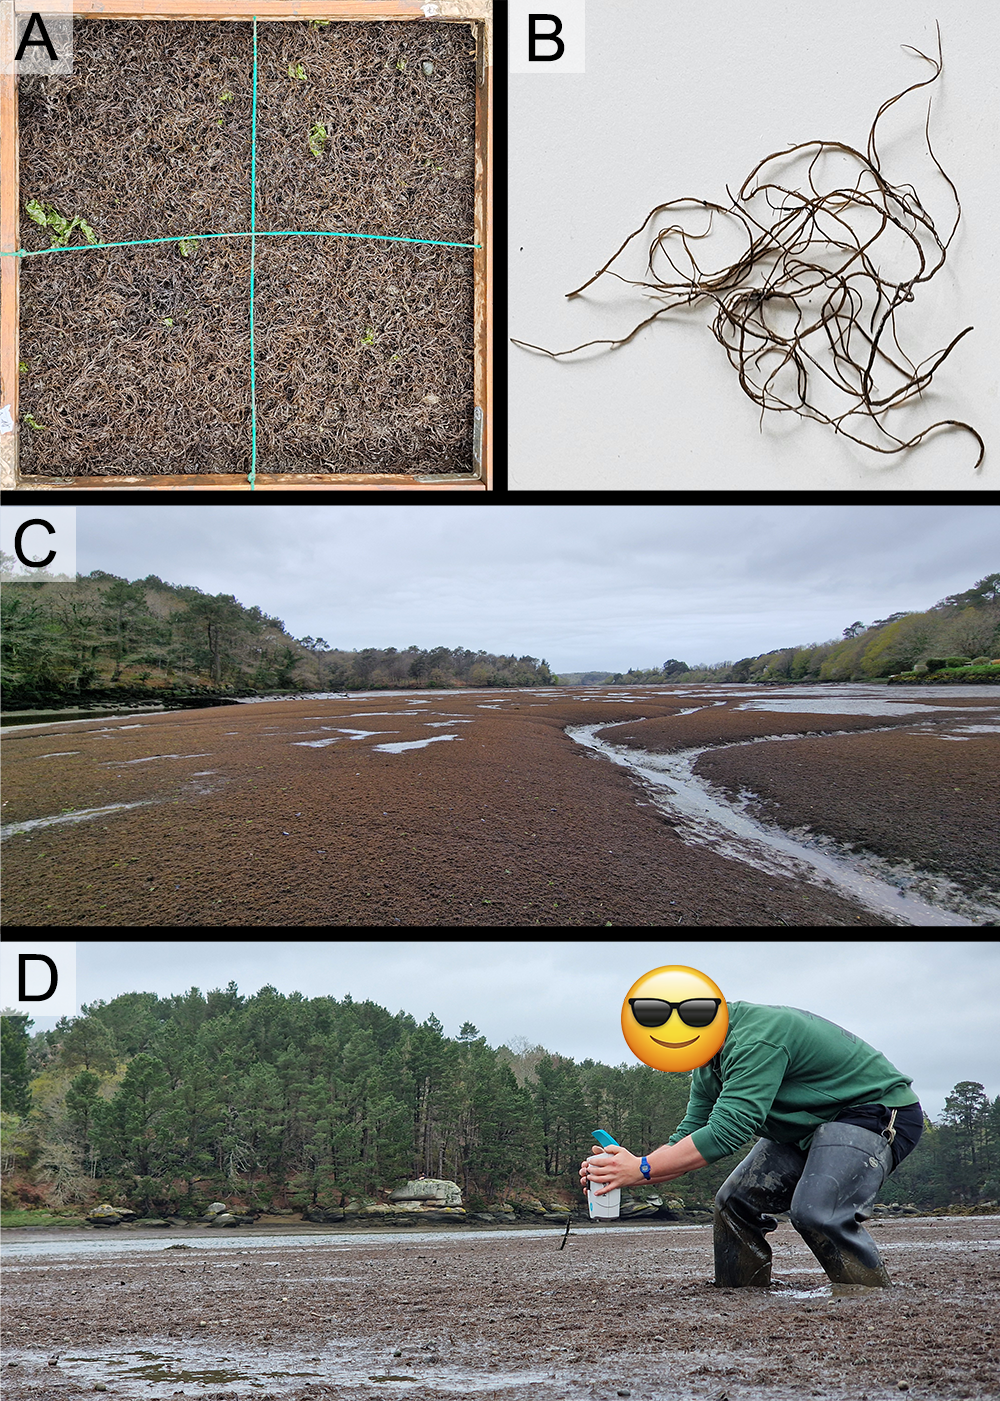

In [ ]:
knitr::include_graphics("./Figures/Low_res/FigurePictures_censored.png")

### Hyperspectral measurements

At each location, hyperspectral reflectance signatures were recorded using an ASD FieldSpec HandHeld 2 spectroradiometer (Malvern Panalytical, Worcestershire, UK), which measures reflectance from 325 to 1075 nm with a spectral resolution of approximately 1 nm \[@fig-PictureFigure D\]. Each spectrum was subsequently smoothed using a Savitzky–Golay filter \[@savitzky1964smoothing\] with a third-order polynomial and an 11-point window, selected to minimize noise while preserving salient spectral features. After this initial smoothing, the first and second derivatives were computed using a central difference approximation (@eq-SecondDerivative).

$$
f''(\lambda_i) \approx \frac{f(\lambda_{i+1}) - 2f(\lambda_i) + f(\lambda_{i-1})}{(\Delta \lambda)^2}
$${#eq-SecondDerivative}

where \$ f(\_i) \$ is the reflectance at wavelength $\lambda_i$ and $\Delta \lambda$ is the uniform spectral sampling interval.

### Drone data

In [ ]:
library(flextable)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::compose() masks flextable::compose()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Country Site Flight Date Area France Aven & Belon Notre-Dame De Tremor 2024-04-11 26.7 Pont du Guilly 2024-04-11 21.3 Spain Saja Estuary Marisma de Cortiguera 2024-06-25 20.4 Marisma de Cudón 2024-06-25 8.4

A total of 6 drone flights were done spread in the 3 study sites. Each time, flights were done at an altitude of 120 m and at a speed of 10 m.s<sup>-1</sup> (@tbl-flights).

#### Multispectral data

At each location, reflectance images with a resolution of 1.2 million pixels were captured using a DJI Matrice 300 quadcopter drone equipped with a Micasense RedEdge Dual MX multispectral camera. The camera recorded data across ten spectral bands, spanning from blue to near-infrared (NIR) wavelengths (444, 475, 531, 560, 650, 668, 705, 717, 740, and 840 nm) (). To ensure consistent lighting conditions, the drone’s flight trajectory was aligned to maintain a solar azimuth angle of 90 degrees. Image acquisition was carried out with an overlap of 70% between side-by-side images and 80% between successive images along the flight path. A downwelling light sensor (DLS2) was used to measure real-time irradiance, enabling the correction of reflectance values for variations in light intensity caused by cloud cover during the flight. The raw image data were subsequently calibrated to reflectance using a calibration panel with ~50% reflectivity, provided by the camera’s manufacturer. Images were processed using structure-from-motion photogrammetry software \[@agisoft\] to generate multispectral ortho-mosaics for each flight. The ortho-mosaicking workflow was consistent across all flights. Initially, key tie points were identified within each image and across overlapping images to create a sparse point cloud. This point cloud was refined by removing noisy points using a reprojection accuracy metric. Subsequently, a dense point cloud was generated using a structure-from-motion algorithm. A digital surface model (DSM) was then created through surface interpolation of the dense point cloud, which served as the basis for reconstructing the multispectral ortho-image \[@nebel2020review\]. The resolution of the multispectral ortho-mosaic obtained were 8 cm per pixel.

#### LiDAR data

LiDAR standing for Light Detection and Ranging uses lasers to measure distances by timing reflected pulses, creating detailed 3D maps of surfaces.

Using the Matrice 300 Series Dual Gimbal Connector, a DJI Zenmuse L1 LiDAR and RGB sensor was mounted on the drone alongside a multispectral camera. This setup enabled the simultaneous capture of LiDAR point clouds, high-resolution RGB images, and multispectral images collected by the MicaSense RedEdge Dual MX during the same flight. The same processing workflow as @sec-photo was applied to process LiDAR RGB images, resulting in ortho-mosaic with a resolution of 2.5 cm per pixel. Since the mapping focused solely on flat surfaces without dense vegetation, the LiDAR measured only a single return. Operating in repetitive scanning mode with a sampling rate of 240 kHz, the system achieved a point density of 350 points per square meter. The LiDAR point cloud was extracted and converted into LAS format using DJI Terra software. The LAS point cloud was then imported into Agisoft Metashape \[@agisoft\] to generate a Digital Surface Model (DSM) with a resolution of 2.5 cm. From the DSM, the slope of each pixel based on a grid of 8 surrounding pixels were computed using the terrain function of the ‘terra’ package in R \[@terrapck\]. The angle of the mudflat was categorized into three classes: Flat (angle \< 10°), Angled (10° ≤ angle ≤ 40°), and Vertical (angle \> 40°).

## Scene classification

In [ ]:
library(tidyverse)
library(flextable)

df_training <- "../Data/Training_DISCOV/DISCOV_Invasea_Saja_filtered.txt" %>% 
  read.delim(sep = ";")


brdr1 <- fp_border_default(color = "black", width = 0.5)
brdr2 <- fp_border_default(color = "grey", width = 1)
brdr3 <- fp_border_default(color = "grey40", width = 1)

i = 16.5 # width of the side borders in the word_document output (in centimeters)
w = i*0.3937 # width of the side borders in the word_document output (in inches)
 
df_table <- df_training %>% 
  dplyr::filter(True_Class != "SunGlint") %>% 
  mutate(DISCOV1_n = case_when(True_Class == "Bacillariophyceae" ~ 4475,
                          True_Class == "Chlorophyta" ~ 17140,
                          True_Class == "Magnoliopsida" ~ 221065,
                          True_Class == "Phaeophyta" ~ 169936,
                          True_Class == "Rhodophyta" ~ 5771,
                          True_Class == "Water" ~ 83677,
                          True_Class == "Sediment" ~ 95126),
         Name = case_when(True_Class == "Bacillariophyceae" ~ "Benthic Diatoms",
                          True_Class == "Chlorophyta" ~ "Green macroalgae",
                          True_Class == "Magnoliopsida" ~ "Seagrass",
                          True_Class == "Phaeophyta" ~ "Brown macroalgae",
                          True_Class == "Rhodophyta" ~ "Red macroalgae",
                          T ~ True_Class),
         True_Class = case_when(True_Class == "Sediment" ~ "-",
                                True_Class == "Water" ~ "-",
                                T ~ True_Class),
         `Difference with DISCOV v1.0` = round((n)/DISCOV1_n,2),
         `Difference with DISCOV v1.0` = case_when(`Difference with DISCOV v1.0` == 1 ~ "-",
                                                   T ~ paste0("x",`Difference with DISCOV v1.0`))) 

A neural network classification model (DISCOV; @rs16234383; @oiry_2024_14218984), previously applied with success to Micasense reflectance data for mapping intertidal vegetation along the Portuguese and French Atlantic coasts, has been used in this study. The training dataset of DISCOV v1.0 has been updated. As shown by @rs16234383 the DISCOV v1.0 model \[@oiry_2024_14218984\] was trained using only 5771 Rhodophyceae pixel (3% of the training dataset). To fill this gap the original training dataset of DISCOV v1.0 was updated using new training pixel coming from the 5 drone flights (@sec-DroneFlights). A total of 427000 pixels where added to the DISCOV training dataset compared to the version 1 (@tbl-Update_training).

In [ ]:
library(tidyverse)
library(flextable)

df_table %>%
  rename(`Taxonomic Class` = "True_Class",
         `Training Pixels` = "n")  %>% 
  dplyr::select(Name,`Taxonomic Class`,`Training Pixels`, `Difference with DISCOV v1.0`) %>% 
  flextable() %>%
  align(align = "center", part = "all") %>% # Align text to center
  set_table_properties(layout = "autofit") # Adjust table layout

Name Taxonomic Class Training Pixels Difference with DISCOV v1.0 Benthic Diatoms Bacillariophyceae 62,436 x13.95 Green macroalgae Chlorophyta 92,585 x5.4 Seagrass Magnoliopsida 221,065 - Brown macroalgae Phaeophyta 169,936 - Red macroalgae Rhodophyta 268,637 x46.55 Sediment - 117,956 x1.24 Water - 91,614 x1.09

In [ ]:
library(tidyverse)
library(sf)

Linking to GEOS 3.11.2, GDAL 3.8.2, PROJ 9.3.1; sf_use_s2() is TRUE

To validate the new version of the DISCOV model, a Shiny app was developed, enabling independent users to photo-interpret snapshots of the ortho-mosaic from each drone flight \[@shinypck; @Simon2024ShinyApp\]. Users could click on various parts of the snapshots to indicate the type of vegetation they believed was present. Using this method, 3 independent users contributed to creating a validation dataset of 6755 pixels across 79 snapshots distributed among the four drone flights \[@tbl-ValidationDataset\]. The validation dataset was then simplify into two classes: Presence of Absence of Red Algae.

In [ ]:
library(tidyverse)
library(flextable)

df_flx_valid <- df_validation %>%
  mutate(site = case_when(site == "Aven" ~ "Notre-Dame De Tremor",
                          site == "Belon" ~ "Pont de Guilly",
                          site == "SajaNorth" ~ "Marisma de Cudón",
                          site == "SajaSouth" ~ "Marisma de Cortiguera"),
         PresenceAbs = case_when(Vegetation == "Red algae" ~ "Present",
                                 T ~ "Absent")) %>% 
  rename(Site = "site") 

total <- df_flx_valid %>% 
  group_by(PresenceAbs) %>% 
  reframe(n = n()) %>% 
  pivot_wider(names_from = PresenceAbs, values_from = n) %>% 
  mutate(Site = "Total")

table_data <- df_flx_valid %>% 
  group_by(Site, PresenceAbs) %>% 
  reframe(n = n()) %>% 
  pivot_wider(names_from = "PresenceAbs", values_from = "n") %>% 
  rbind(total) %>% 
  rowwise() %>% 
  mutate(Total = sum(c(Absent, Present)))

# Get the number of rows for the table data
n_rows <- nrow(table_data)

# Create the flextable with a horizontal line
table_data %>%
  flextable() %>%
  align(align = "center", part = "all") %>% 
  set_table_properties(layout = "autofit") %>%
  hline(i = n_rows - 1, border = officer::fp_border(color = "black", width = 1))

Site Absent Present Total Marisma de Cortiguera 1,531 483 2,014 Marisma de Cudón 1,237 136 1,373 Notre-Dame De Tremor 1,073 463 1,536 Pont de Guilly 1,389 443 1,832 Total 5,230 1,525 6,755

## Historical Presence of *Gracilaria vermiculophylla* in the Bélon esturay

To assess the historical presence of *G. vermiculophylla* in the Bélon Estuary, aerial imagery from flight campaigns was obtained via the IGN platform “Remonter Le Temps” \[@RemonterLeTempsIGN\]. Nine images were selected between 1952 and 2012 from the IGN plateform and an additional one has been added for the year 2024 (@tbl-IGNimg). Since most of the images retrieved from “Remonter Le Temps” were digitized versions of physical photographs, georeferencing were required.

In [ ]:
library(flextable)

 data.frame(
  Date = c(
    "1952-04-26",
    "1958-04-22",
    "1976-07-? ",
    "1978-08-22",
    "1982-08-11",
    "1992-05-17",
    "1997-04-11",
    "2012-07-24",
    "2024-04-11"),
  Type = c(
    "Black and White",
    "Black and White",
    "Black and White",
    "Black and White",
    "Black and White",
    "True Color",
    "Black and White",
    "True Color",
    "True Color"),
  DataSource = c(    
    "IGN",
    "IGN",
    "IGN",
    "IGN",
    "IGN",
    "IGN",
    "IGN",
    "IGN",
    "Drone Flight"),
  Res = c(
     "10",
     "90",
     "4",
     "44",
     "44",
     "70",
     "64",
     "18",
     "3"
  )) %>% 
 dplyr::rename(`Resolution (cm per Pixel)` = "Res",
               `Data Source` = "DataSource") %>% 
  flextable()%>%
  align(align = "center", part = "all") %>% # Align text to center
  set_table_properties(layout = "autofit")

Date Type Data Source Resolution (cm per Pixel) 1952-04-26 Black and White IGN 10 1958-04-22 Black and White IGN 90 1976-07-? Black and White IGN 4 1978-08-22 Black and White IGN 44 1982-08-11 Black and White IGN 44 1992-05-17 True Color IGN 70 1997-04-11 Black and White IGN 64 2012-07-24 True Color IGN 18 2024-04-11 True Color Drone Flight 3

For each date, polygons have been drawn around *G. vermiculophylla* patches by visually photo-interpreting on each images. These polygons were used to calculate the total area of the mudflat covered by macroalgae within a common extent of 30 hectares in Pont de Guilly, located in the Bélon Estuary, South Brittany, France.

# Results

## Historical records in the Belon estuary

In [ ]:
library(tidyverse)
library(sf)
library(terra)
library(tidyterra)

img_list <- list.files("Data/RemonterLeTemps/img", full.names = T, include.dirs = F) %>% 
  as_tibble() %>% 
  rename(path ="value") %>% 
  dplyr::filter(!str_detect(path, "RAW")) %>% 
  mutate(filename = gsub(".*/","",path),
         source = case_when(str_detect(filename, "IGNF") ~ "IGN",
                          T ~ "Other"),
         year = as.integer(case_when(source == "IGN" ~ substr(filename,15,18),
                          T ~ substr(filename,1,4))))

mask <- "Data/RemonterLeTemps/shp/mask/IntertidalMask_Belon_RemonterLeTemps.shp" %>% 
  read_sf()

Pres_algae <- "Data/RemonterLeTemps/shp/shape_red_algae/Presence_Absence_RedAlgae_Date.shp" %>% read_sf()



Text_position <- data.frame(x = rep(ext(mask)[1]+0.9*(ext(mask)[2]-ext(mask)[1]),nrow(img_list)),
                            y = rep(ext(mask)[3]+0.9*(ext(mask)[4]-ext(mask)[3]),nrow(img_list)),
                            year = img_list$year)

for(i in 1:nrow(img_list)){
  

  img <- rast(img_list$path[i]) %>% 
    project(crs(mask)) %>% 
    crop(mask, mask = T)
  
  date_i <- Text_position[i,]
  # shp_i <- Pres_algae %>% 
  #   dplyr::filter(date == img_list$year[i])
  # 
  # if(img_list$year[i] == 2024){
  #   shp_i <- shp_i %>% 
  #     st_buffer(dist = 0.3) %>% 
  #     st_union()
  # }
  # 
  
Plot <-  
  if(nlyr(img) != 1){
    RGB(img)<-1:3
    
    ggplot()+
      geom_spatraster_rgb(data = img)
  }else{
    names(img) = "layer"
    ggplot()+
      geom_spatraster(img, mapping = aes(fill = layer), show.legend = F)+
      scale_fill_gradient(low = "black", high = "white", limits = c(0,240),na.value = NA, name = "Greyscale")
  }

a <- Plot +
    geom_text(data = date_i, aes(x = x, y = y, label = year),
              size = 7)+
  # geom_sf(data = shp_i, fill = NA, color = "darkred")+ 
   coord_sf(xlim = c(ext(mask)[1],ext(mask)[2]),
            ylim = c(ext(mask)[3],ext(mask)[4]),
            expand = F)+
    # geom_text(data = date_i, aes(x = x, y = y, label = year),
    #           size = 10)+
    theme_Bede()+
    theme(axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks.x = element_blank(),
          axis.ticks.y = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          strip.clip = "inherit",
          panel.spacing = unit(0,"pt"), 
          plot.margin = unit(c(0, 0, 0, 0), "lines"))+
    if(img_list$year[i] == 2024){
    ggspatial::annotation_scale(location = "bl",
                                pad_y = unit(0.3, "cm"),
                                text_cex=1)
    }
  
  
a 
  
assign(paste0("plot_",as.character(img_list$year[i])),a)
  
}


# plot_all <- (plot_1952 + plot_1958)/
# (plot_1976 + plot_1978)/
# (plot_1982 + plot_1992)/
# (plot_1997 + plot_2012)/
# (plot_2019 + plot_2024)

plot_all <- (plot_1952 + plot_1958 + plot_1976)/
(plot_1978 + plot_1982 + plot_1992)/
(plot_1997 + plot_2012 + plot_2024)


ggsave("Paper/Figures/High_res/Historical_maps.png",plot_all, width = 10, height = 4.52, dpi = 400)
ggsave("Paper/Figures/Low_res/Historical_maps.png",plot_all, width = 10, height = 4.52, dpi = 200)

In [ ]:
library(tidyverse)
library(sf)
library(Utilities.Package)

mask <- "Data/RemonterLeTemps/shp/mask/IntertidalMask_Belon_RemonterLeTemps.shp" %>% 
  read_sf() %>% 
  mutate(area = st_area(.)) %>% 
  pull(as.numeric(area)[1])

Pres_algae <- "Data/RemonterLeTemps/shp/shape_red_algae/Presence_Absence_RedAlgae_Date.shp" %>% 
  read_sf() %>% 
  mutate(area = st_area(.)) %>% 
  group_by(date) %>% 
  reframe(area = sum (area)) %>% 
  mutate(prop = as.numeric((area/mask)*100)) %>% 
  dplyr::select(-area)

plot <- data.frame(date = c(1952,1958),
           prop = c(0,0)) %>% 
  bind_rows(Pres_algae) %>% 
ggplot(aes(x = date, y = prop))+
  # geom_bar(stat = "identity",size = 10 )+
  geom_point(size = 4)+
  xlab("Year")+
  ylab("Cover of Gracilaria (%)")+
  
  # geom_line()+
  geom_vline(xintercept = 1971, linetype = "dashed", color = "darkred", linewidth=1)+
  geom_vline(xintercept = 1994, linetype = "dashed", color = "goldenrod", linewidth=1)+
    geom_rug(sides = "b") +  # Add ticks at the bottom for each x-value
  geom_text(
    x = 1970, 
    y = 30, 
    label = expression(paste("First introduction of ", italic("Crassostrea gigas"))), 
    angle = 90
  )+
  geom_text(
    x = 1972, 
    y = 30, 
    label = expression(paste("in France")), 
    angle = 90
  )+
  geom_text(
    x = 1993, 
    y = 30, 
    label = expression(paste("First record of ", italic("Gracilaria vermiculophylla"))), 
    angle = 90
  )+
  geom_text(
    x = 1995, 
    y = 30, 
    label = expression(paste("in the Belon Estuary")), 
    angle = 90
  )+
  theme_Bede()+
  theme(axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20), 
        plot.background = element_rect(fill = "white", color = NA))
 # geom_line()
ggsave("Paper/Figures/High_res/Cover_Gracillaria_vs_Time.png", plot, width = 10, height = 6, dpi = 400)
ggsave("Paper/Figures/Low_res/Cover_Gracillaria_vs_Time.png", plot, width = 10, height = 6, dpi = 200)

A clear shift in sediment coloration over the paste 70 years were observed, closely aligned with the subsequent proliferation of the invasive red macroalga *Gracilaria vermiculophylla* (@fig-HistoricalMap). Before 1976, the sediments appeared relatively light, indicating no detectable presence of this species. Following its initial appearance in 1976, subtle darkening of the sediment became discernible, coinciding with the early establishment of *G. vermiculophylla*. During the subsequent decades, the late 1970s through the 1990s, this darkening trend became more pronounced and widespread, reflecting an increasing spatial coverage and biomass of the algae. By the early 2000s, and especially by 2024, the sediment exhibited consistently darker tones, indicative of extensive and persistent colonization by *G. vermiculophylla*.

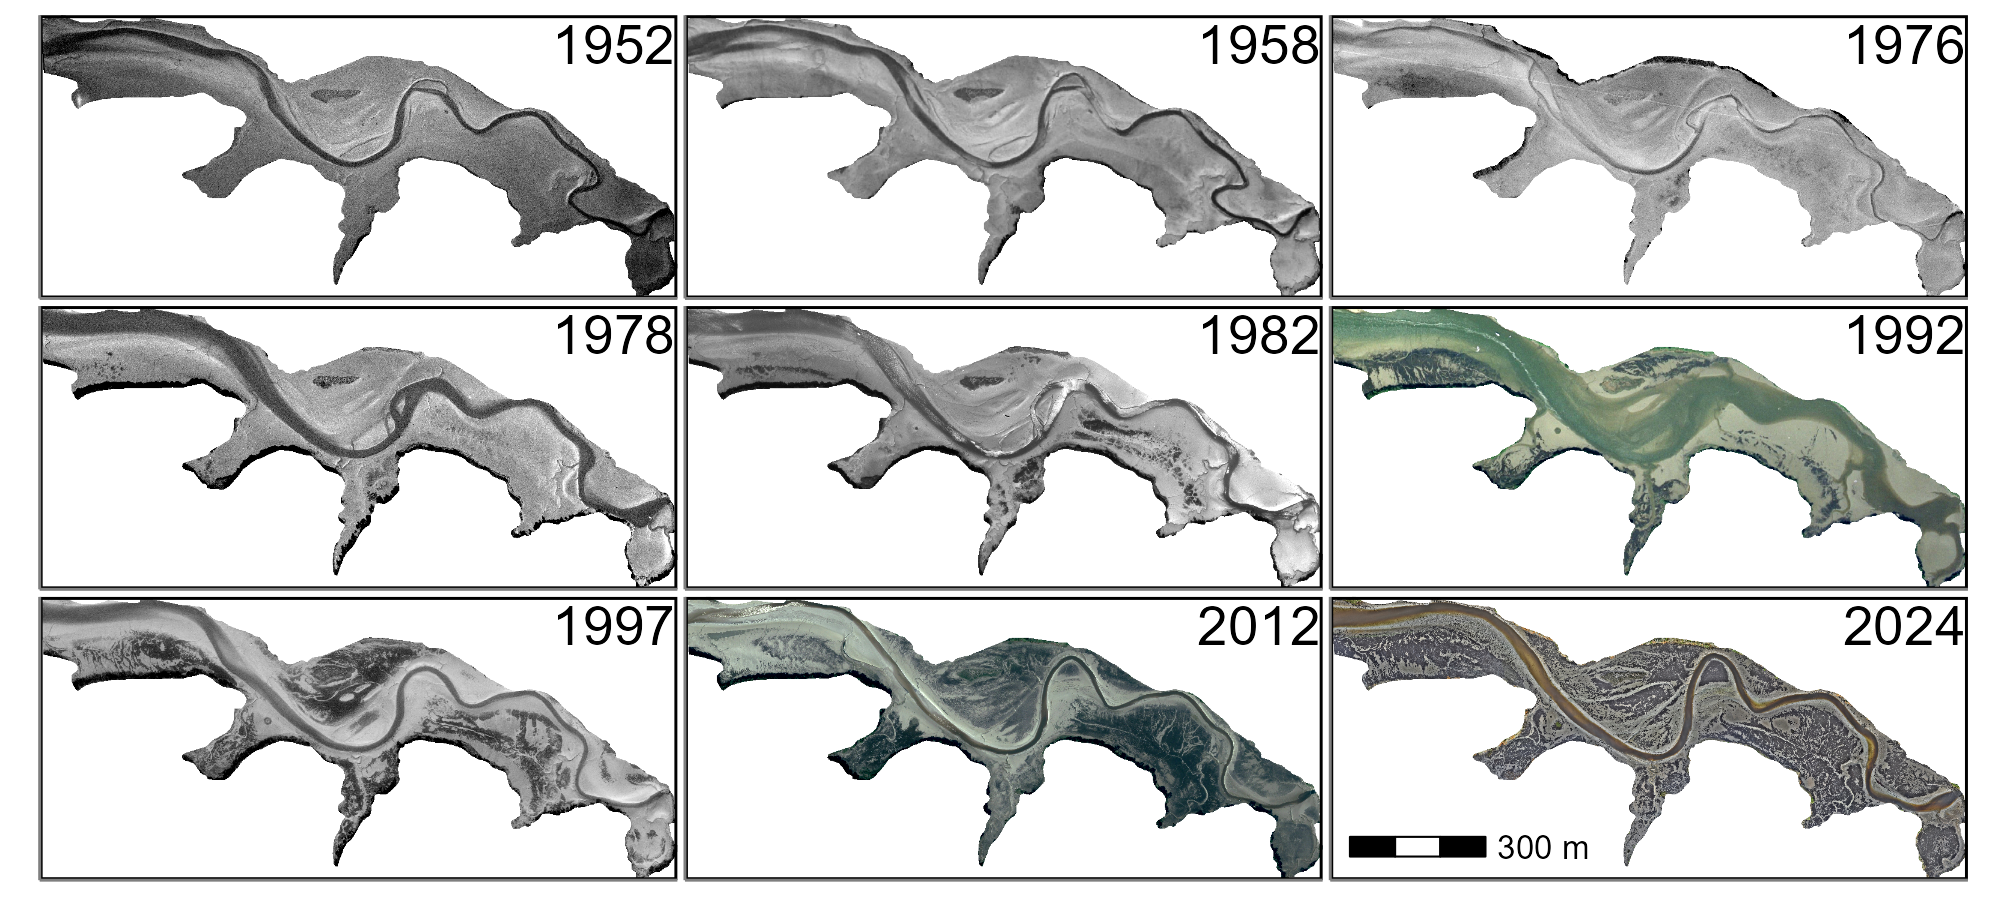

In [ ]:
knitr::include_graphics("./Figures/Low_res/Historical_maps.png")

From the early recordings in the 1950s through the late 1970s, *Gracilaria vermiculophylla* coverage remained effectively at 0% (@fig-HistoricalPlot). Shortly after the introduction of *Crassostrea gigas* in the estuary (see vertical red dashed line in the figure), the first detectable presence of *G. vermiculophylla* emerged. By 1976, it covered 2.5% (0.7 ha) of the Pont du Guilly area, and by 1978 it had increased slightly to 3.0% (0.9 ha). From 1982 onward, coverage expanded more rapidly, increasing from 6.6% (2.0 ha) in 1982 to 14.7% (4.5 ha) in 1992 and nearly 30% (9.0 ha) by 1997. This upward trend continued into the 21st century, peaking at 43.8% (13.3 ha) in 2012. Although coverage fluctuated somewhat thereafter (40.6% in 2019 and 40.2% in 2024), it remained consistently high, indicating sustained and widespread colonization.

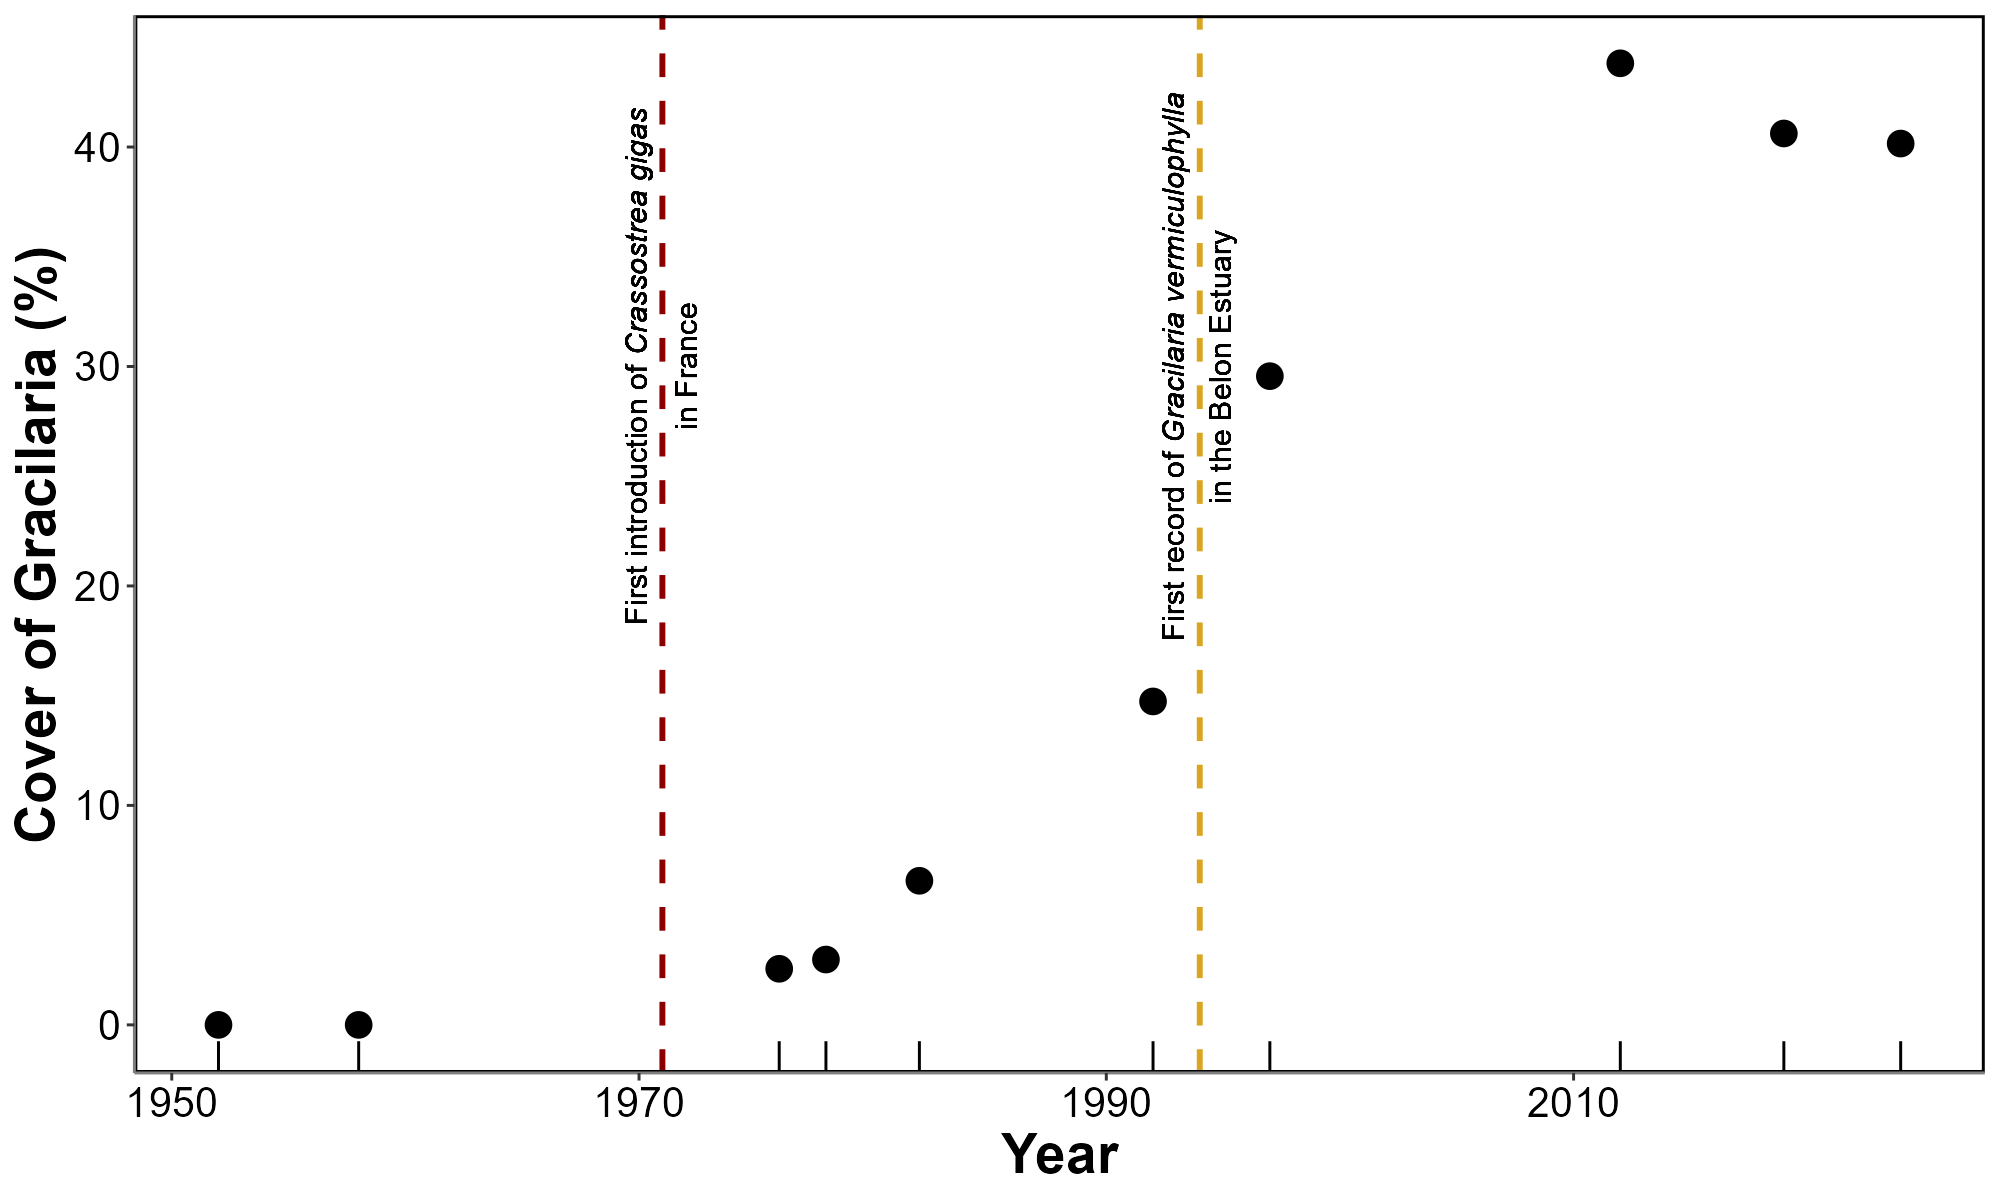

In [ ]:
knitr::include_graphics("./Figures/Low_res/Cover_Gracillaria_vs_Time.png")

## Spectral description

In [ ]:
library(tidyverse)
library(terra)
library(sf)
library(signal)
library(Utilities.Package)

 # Set the path to the directory containing the CSV files
csv_directory <- "Data/ASD"

# List all CSV files in the directory
csv_files <- list.files(path = csv_directory, pattern = "\\.csv$", full.names = TRUE)

# Read and combine all CSV files into one dataframe
df <- csv_files %>%
  lapply(read.csv) %>%  # Read each CSV file into a list of dataframes
  bind_rows() %>%         # Combine all dataframes into one
  dplyr::filter(Letter == "Field") %>% 
  dplyr::select(c(Wavelength, mean_RAW, ID)) %>% 
  pivot_wider(names_from = ID, values_from = mean_RAW)



# User-defined parameters
p <- 3      # polynomial order for Savitzky-Golay
n <- 11     # frame length (odd number, e.g. 11)
factor <- 5 # degrade resolution by a factor of 5

# Assuming your initial dataframe is called df
# df: first column is wavelength, subsequent columns are spectra
wavelength <- df[[1]]
reflectances <- df[,-1]

# Compute original wavelength spacing
d_lambda <- wavelength[2] - wavelength[1]

# 1. Degrade the spectral resolution
# Create a new wavelength vector with coarser spacing
new_wavelength <- seq(from = min(wavelength), to = max(wavelength), by = factor * d_lambda)

# Interpolate the spectra onto the new wavelength grid
degraded_spectra <- apply(reflectances, 2, function(spec) {
  approx(x = wavelength, y = spec, xout = new_wavelength)$y
})

# Now our working wavelength and reflectances become:
wavelength <- new_wavelength
reflectances <- degraded_spectra

# Update the spacing to reflect the new degraded resolution
d_lambda <- wavelength[2] - wavelength[1]

# 2. Perform initial Savitzky-Golay smoothing on each degraded-resolution spectrum
smooth_spectra <- apply(reflectances, 2, sgolayfilt, p = p, n = n)

# Define a function for first derivative using central differences
first_derivative <- function(x, d) {
  n <- length(x)
  d1 <- numeric(n)
  d1[2:(n-1)] <- (x[3:n] - x[1:(n-2)]) / (2*d)
  d1[1] <- NA
  d1[n] <- NA
  return(d1)
}

# 3. Compute the first derivative from the smoothed spectra
d1_spectra <- apply(smooth_spectra, 2, first_derivative, d = d_lambda)

# Helper function to safely smooth a vector that may have NAs at boundaries
safe_sgolay <- function(x, p, n) {
  # Replace NAs at edges with nearest non-NA values before smoothing
  if (is.na(x[1])) {
    first_valid <- which(!is.na(x))[1]
    x[1:(first_valid-1)] <- x[first_valid]
  }
  if (is.na(x[length(x)])) {
    last_valid <- rev(which(!is.na(x)))[1]
    x[(last_valid+1):length(x)] <- x[last_valid]
  }
  sgolayfilt(x, p = p, n = n)
}

# 4. Smooth the first derivative again using Savitzky-Golay
d1_spectra_smooth <- apply(d1_spectra, 2, safe_sgolay, p = p, n = n)

# Define a function for second derivative using central differences
second_derivative <- function(x, d) {
  n <- length(x)
  d2 <- numeric(n)
  d2[2:(n-1)] <- (x[3:n] - 2*x[2:(n-1)] + x[1:(n-2)]) / (d^2)
  d2[1] <- NA
  d2[n] <- NA
  return(d2)
}

# 5. Compute the second derivative from the smoothed first derivative
d2_spectra <- apply(d1_spectra_smooth, 2, second_derivative, d = d_lambda)

# 6. Finally, smooth the second derivative again using Savitzky-Golay
d2_spectra_smooth <- apply(d2_spectra, 2, safe_sgolay, p = p, n = n)

# Combine results into a final dataframe
result_df <- data.frame(wavelength = wavelength, d2_spectra_smooth) %>% 
  as_tibble() %>% 
  pivot_longer(-wavelength, names_to = "spectra", values_to = "deriv") %>% 
  group_by(wavelength) %>% 
  reframe(mean = mean(deriv, na.rm = T),
          sd = sd(deriv, na.rm=T))


df_spectra <- csv_files %>%
  lapply(read.csv) %>%  # Read each CSV file into a list of dataframes
  bind_rows() %>%         # Combine all dataframes into one
  dplyr::filter(Letter == "Field")%>% 
  group_by(Wavelength) %>% 
  reframe(mean = mean(mean_RAW, na.rm = T),
          sd = sd(mean_RAW, na.rm=T))

chla= 678
PE = 565
PC = 620

a <- ggplot(result_df) +
  geom_line(aes(x = wavelength+10, y = mean))+
  geom_ribbon(aes(x = wavelength+10, y = mean, ymin = mean-sd, ymax = mean+sd), alpha = 0.05)+
  geom_vline(xintercept = chla,
    color = "darkred", linetype = "dashed")+ # chl-a
  geom_vline(xintercept = PE,
    color = "darkgreen", linetype = "dashed")+ 
  geom_vline(xintercept = PC,
    color = "goldenrod", linetype = "dashed")+
  # geom_vline(xintercept = 645, linetype = "dashed")+

  xlim(400, 700)+
  theme_Bede()+
    geom_text(x= 420, y = 10e-06, label = "B", size = 8)+
  ylab("Second Derivative")+
  xlab("Wavelength")+
  # geom_text(
  #   x = 557, 
  #   y = -0.000006, 
  #   label = "Absorption Phycoerythrin", 
  #   angle = 90,
  #   color = "darkgreen"
  # )+
  # geom_text(
  #   x = 612, 
  #   y = -0.000006, 
  #   label = "Absorption Phycocyanin", 
  #   angle = 90,
  #   color = "goldenrod"
  # )+
  # geom_text(
  #   x = 670, 
  #   y = -0.000006, 
  #   label = "Absorption Chlorophyll-a", 
  #   angle = 90,
  #   color = "darkred"
  # )+
  scale_y_continuous(position = "right",
                     labels = scales::label_number(
                       suffix = "e-06", scale = 1e6))+
  theme(panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25),
      plot.background = element_rect(fill = "white", color = NA)
  )


b <- ggplot(df_spectra) +
  geom_line(aes(x = Wavelength, y = mean))+
  geom_ribbon(aes(x = Wavelength, y = mean, ymin = mean-sd, ymax = mean+sd), alpha = 0.05)+
  geom_vline(xintercept = chla,
    color = "darkred", linetype = "dashed")+ # chl-a
  geom_vline(xintercept = PE,
    color = "darkgreen", linetype = "dashed")+ 
  geom_vline(xintercept = PC,
    color = "goldenrod", linetype = "dashed")+
  # geom_vline(xintercept = 645, linetype = "dashed")+
  ylab("Reflectance")+
  geom_text(
    x = 552, 
    y = 0.17, 
    label = "Absorption Phycoerythrin", 
    angle = 90,
    color = "darkgreen"
  )+
  geom_text(
    x = 607, 
    y = 0.17, 
    label = "Absorption Phycocyanin", 
    angle = 90,
    color = "goldenrod"
  )+
  geom_text(
    x = 665, 
    y = 0.17, 
    label = "Absorption Chlorophyll-a", 
    angle = 90,
    color = "darkred"
  ) +
    geom_text(x= 420, y = 0.232, label = "A", size = 8)+

  theme_Bede()+
    theme( panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25),
      plot.background = element_rect(fill = "white", color = NA))

plot <- (b)+(a)
plot

 ggsave("Paper/Figures/High_res/plot_spectral_signature.png",plot, width = 10, height = 5, dpi = 400)
 ggsave("Paper/Figures/Low_res/plot_spectral_signature.png",plot, width = 10, height = 5, dpi = 200)

##### INDEX ######
# 
# spec_lib <- readxl::read_excel("Data/speclib/Spectral_library_VEG_smoothed_A_GERAUD.xlsx") %>% 
#   pivot_longer(-Wavelength, names_to = "Species", values_to = "Ref") %>% 
#   mutate(ID = Species,
#          Species = sub("\\.\\.\\..*$", "", Species), 
#          Class = case_when(str_detect(Species, "nodosum") ~ "Phaeophyceae",
#                            str_detect(Species, "paludosa") ~ "Bacillariophyceae",
#                            str_detect(Species, "spiralis") ~ "Phaeophyceae",
#                            str_detect(Species, "limosum") ~ "Bacillariophyceae",
#                            str_detect(Species, "ramosissima") ~ "?",
#                            str_detect(Species, "Ulva ") ~ "Chlorophyceae",
#                            str_detect(Species, "serratus") ~ "Phaeophyceae",
#                            str_detect(Species, "Codium ") ~ "Chlorophyceae",
#                            str_detect(Species, "vesiculosus") ~ "Phaeophyceae",
#                            str_detect(Species, "okamurae") ~ "Phaeophyceae",
#                            str_detect(Species, "Vaucheria") ~ "Xanthophyceae",
#                            str_detect(Species, "marina") ~ "Magnoliopsida",
#                            str_detect(Species, "noltei") ~ "Magnoliopsida")) %>% 
#   group_by(Class, Wavelength) 
# 
#  
#  indices_speclib <- spec_lib %>% 
#    pivot_wider(names_from = "Wavelength", values_from = "Ref") %>% 
#    group_by(Species,ID,Class) %>% 
#    reframe(NDVI = (`800` - `668`)/(`800` + `668`),
#            GLI = ((`550` - `668`)+(`550` - `451`))/(2*`550`+`668`+`451`),
#            GNDVI =  (`800` - `550`)/(`800` + `550`),
#            EVI = (`800` - `668`)/(`800` - 6*`668` - 7.5*`451`+1),
#            # MSAVI =(2*`800`+ 1 - sqrt(((2*`800`-1)*(2*`800`-1))-8*(`800`-`668`)))/2
#            )
#  
#  
#  df_spectra_indices <- csv_files %>%
#   lapply(read.csv) %>%  # Read each CSV file into a list of dataframes
#   bind_rows() %>%         # Combine all dataframes into one
#   dplyr::filter(Letter == "Field") %>% 
#    mutate(Class = "Rhodophyceae",
#           Species = "G.vermiculophylla") %>% 
#    dplyr::select(c(Class,Species,ID,Wavelength,mean_RAW)) %>% 
#    pivot_wider(names_from = "Wavelength", values_from = "mean_RAW") %>% 
#    group_by(Species,ID,Class) %>% 
#    reframe(NDVI = (`800` - `668`)/(`800` + `668`),
#            GLI = ((`550` - `668`)+(`550` - `451`))/(2*`550`+`668`+`451`),
#            GNDVI =  (`800` - `550`)/(`800` + `550`),
#            EVI = (`800` - `668`)/(`800` - 6*`668` - 7.5*`451`+1),
#            # MSAVI =(2*`800`+ 1 - sqrt(((2*`800`-1)*(2*`800`-1))-8*(`800`-`668`)))/2
#            )
# 
#  all__indices <-df_spectra_indices %>% 
#    bind_rows(indices_speclib)
# 
#  all__indices %>% 
#    dplyr::filter(!Class %in% c("Bacillariophyceae","?")) %>% 
#    pivot_longer(c(NDVI,GLI,GNDVI,EVI), names_to = "Indice",values_to = "value") %>% 
#    ggplot(aes(x = Class, y = value, color = Class, group = interaction(Indice,Class)))+
#    facet_wrap(~ Indice)+
#    geom_boxplot()+
#    theme_Bede()
#  
#  spec_lib %>% 
#   reframe(mean = mean(Ref, na.rm = T),
#           sd = sd(Ref, na.rm = T)) %>% 
#   ggplot()+
#   geom_line(aes(x = Wavelength, y =mean, group = Class, color = Class))+
#   geom_vline(xintercept = chla,
#     color = "darkred", linetype = "dashed")+ # chl-a
#   geom_vline(xintercept = PE,
#     color = "darkgreen", linetype = "dashed")+ 
#   geom_vline(xintercept = PC,
#     color = "goldenrod", linetype = "dashed")

The spectral signature of *Gracilaria vermiculophylla* was characterized by a wavy reflectance pattern in the visible region of the spectrum, between 500 and 700 nm (@fig-SpecDescri A). This pattern was primarily driven by the presence of phycoerythrin and phycocyanin, which exhibited maximum absorption peaks at approximately 565 nm and 620 nm, respectively. An additional absorption feature around 495 nm was likely attributable to the presence of accessory carotenoid pigments. The most pronounced absorption peak occurred at 675 nm, corresponding to chlorophyll-a absorption. The second derivative analysis clearly highlighted the inflection points corresponding to the main absorption peaks at 495, 565, 620, and 675 nm, allowing for a more precise identification of the spectral contributions of these pigments (@fig-SpecDescri B).

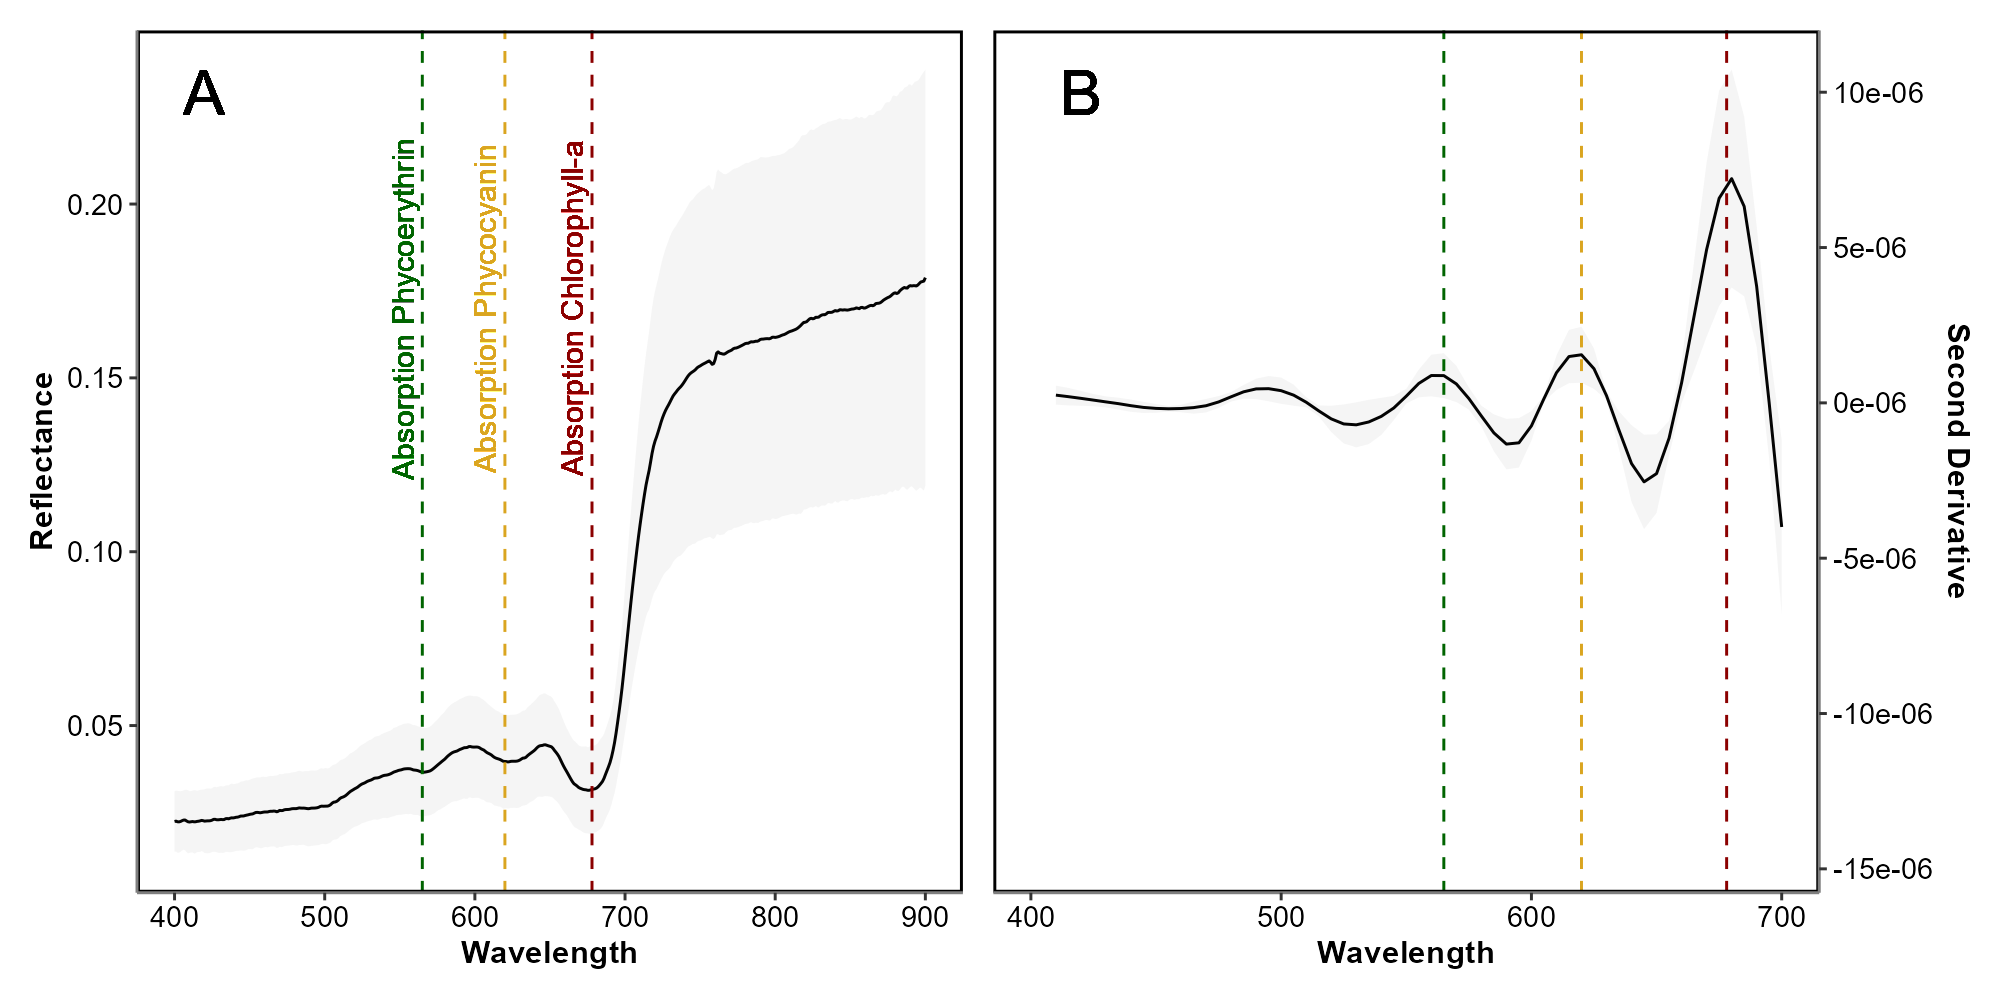

In [ ]:
knitr::include_graphics("./Figures/Low_res/plot_spectral_signature.png")

## Spatial distribution

In [ ]:
library(terra)
library(tidyverse)
library(Utilities.Package)
library(sf)

msk <- "Data/shp/mask/Belon_32630.shp" %>% 
  read_sf()

DISCOV_rast <- rast("Data/DISCOV/Belon_1104_MS_DISCOV_InvaSea_26112024_pred.tif") %>% 
  project(crs(msk), method = "near") %>% 
  crop(msk, mask = T)

values(DISCOV_rast)[values(DISCOV_rast) == 0] = NA
names(DISCOV_rast) <- "layer"
DISCOV_rast<-DISCOV_rast %>% 
  as.factor()

DISCOV_Belon <- ggplot()+
    tidyterra::geom_spatraster(data = DISCOV_rast, 
                               mapping = aes(fill = layer),
                               maxcell = 500832*8)+
  scale_fill_manual(breaks = c(1,2,3,4,5,6,8),
                    values=c("#DAA520","#b3ff1a","#389318","#873e23","#b3002d","#a2a3a2","#42c9bc",NA,NA),
                    na.value = NA,
                    name = "DISCOV v2",
                    labels = c("Bacillariophyceae",
                               "Chlorophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Sediment",
                               "Water"))+
  geom_text(aes(x =  ext(DISCOV_rast)[1]+0.04*(ext(DISCOV_rast)[2]-ext(DISCOV_rast)[1]),
                y =  ext(DISCOV_rast)[4]-0.08*(ext(DISCOV_rast)[4]-ext(DISCOV_rast)[3]),
                label = "A"),
                size = 10)+
  coord_sf(expand = F,
           xlim = c(450180.4, 451247.2+18),
           ylim = c(5296561, 5297042))+
  theme_Bede_Map()+
  # coord_equal()+
   theme(
     # axis.text.x = element_text(size = 10, angle = -20, color = NA,hjust = 0),
         axis.text.y = element_text(size = 10),
         axis.text.x = element_blank(),
         axis.ticks.x = element_blank(),
         axis.title = element_blank(),
         plot.background = element_rect(fill = "white", color = NA),
         legend.background = element_blank(),
         legend.position = c(0.98,0.98),
         legend.text = element_text(size = 10),
         legend.key.size = unit(0.5,"cm"))

ggsave("Paper/Figures/High_res/Prediction_Map/Belon_DISCOV.png",DISCOV_Belon,width = 10, height = 4.225, dpi = 400)

In [ ]:
library(sf)
library(terra)
library(tidyverse)
library(Utilities.Package)

msk <- "Data/shp/mask/Belon_32630.shp" %>% 
  read_sf()

Belon_RGB <- "Data/RGB/Belon_RGB_MULTI.tif" %>% 
  rast() %>% 
  crop(msk, mask = T)

# values(Belon_RGB[[1]])[values(Belon_RGB[[1]]) == 0] = NA

# RGB(Belon_RGB) <- 1:3


lim_x<- c(as.numeric(ext(Belon_RGB)[1:2]))
lim_y<- c(as.numeric(ext(Belon_RGB)[3:4]))


 RGB_Belon<- ggplot()+
   tidyterra::geom_spatraster_rgb(data = Belon_RGB,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4010533
         )+
  geom_text(aes(x =  ext(Belon_RGB)[1]+0.04*(ext(Belon_RGB)[2]-ext(Belon_RGB)[1]),
                y =  ext(Belon_RGB)[4]-0.08*(ext(Belon_RGB)[4]-ext(Belon_RGB)[3]),
                label = "B"),
                size = 10)+
    ggspatial::annotation_scale(location = "br",
                                pad_y = unit(0.5, "cm"),
                                text_cex=2)+
   theme_Bede_Map()+
  coord_sf(expand = F,
           xlim = c(450180.4, 451247.2+18),
           ylim = c(5296561, 5297042))+
  # coord_equal()+
   theme(
     # axis.text.x = element_text(size = 10, angle = -20,hjust = 0, color = NA),
         axis.text.y = element_text(size = 10),
         axis.text.x = element_blank(),
         # axis.ticks.y = element_blank(),
         axis.ticks.x= element_blank(),
         plot.background = element_rect(fill = "white", color = NA), 
         axis.title = element_blank())

 
 ggsave("Paper/Figures/High_res/Prediction_Map/Belon_RGB.png",RGB_Belon,width = 10, height = 4.225, dpi = 400)

In [ ]:
library(terra)
library(tidyverse)
library(Utilities.Package)
library(scico)



msk <- "Data/shp/mask/Belon_DEM_32630.shp" %>% 
  read_sf()

DEM_rast <- rast("Data/DEM/Belon_DEM_LiDAR.tif") %>% 
  crop(msk, mask = T) %>% 
  terra::resample(Belon_RGB, method = "near")

p999 <- quantile(DEM_rast %>% as.data.frame() %>%  pull(Belon_DEM_LiDAR), probs = 0.999)

values(DEM_rast)[values(DEM_rast) > p999] = NA
values(DEM_rast)[values(DEM_rast) < 0] = NA

lim_x<- c(as.numeric(ext(Belon_RGB)[1:2]))
lim_y<- c(as.numeric(ext(Belon_RGB)[3:4]))


bathy_Belon <- ggplot()+
   # tidyterra::geom_spatraster_rgb(data = Belon_RGB,
   #       r = 1,
   #       g = 2,
   #       b = 3,
   #       maxcell = 1000,
   #       alpha = 0
   #       )+
    tidyterra::geom_spatraster(data = DEM_rast, 
                               mapping = aes(fill = Belon_DEM_LiDAR ),
                               maxcell = 500832)+
  scale_fill_scico(palette = "batlow", 
                   na.value = NA,
                   name = "Bathymetry",
                   breaks = c(0,1.5,3),
                   limits = c(0,3),
                   labels = c("0 m","1.5 m", "3 m")) +
  geom_text(aes(x =  ext(Belon_RGB)[1]+0.04*(ext(Belon_RGB)[2]-ext(Belon_RGB)[1]),
                y =  ext(Belon_RGB)[4]-0.08*(ext(Belon_RGB)[4]-ext(Belon_RGB)[3]),
                label = "C"),
                size = 10)+
  theme_Bede_Map()+
  coord_sf(expand = F,
           xlim = c(450180.4, 451247.2+18),
           ylim = c(5296561, 5297042))+
  # coord_equal()+
   theme(
     # axis.text.x = element_text(size = 10, angle = -20,hjust = 0, color = NA),
         axis.text.y = element_text(size = 10),
         axis.text.x = element_blank(),
         # axis.ticks.y = element_blank(),
         axis.ticks.x= element_blank(),
         plot.background = element_rect(fill = "white", color = NA), 
         axis.title = element_blank())

 ggsave("Paper/Figures/High_res/Prediction_Map/Belon_Bathy.png",bathy_Belon,width = 10, height = 4.225, dpi = 400)
 
 # nrow(DEM_rast %>%  as.data.frame() %>% dplyr::filter(!is.na(Belon_DEM_LiDAR)))

In [ ]:
msk <- "Data/shp/mask/Belon_DEM_32630.shp" %>% 
  read_sf()

Belon_RGB <- "Data/RGB/Belon_RGB_MULTI.tif" %>% 
  rast() %>% 
  crop(msk, mask = T)

DEM_rast <- rast("Data/DEM/Belon_DEM_LiDAR.tif") %>% 
  crop(msk, mask = T)

Angle_df<-read_csv("Data/Model/FullDF_10timesResample_DEMSlope_PredPercent.csv") %>% 
  dplyr::filter(Site  == "Belon")



angle_plot <- ggplot()+
    tidyterra::geom_spatraster(data = DEM_rast, 
                               mapping = aes(fill = Belon_DEM_LiDAR ),
                               maxcell = 100,
                               alpha=0, 
                               show.legend = F)+
  scico::scale_fill_scico(palette = "batlow", na.value = NA,
                   name = "Bathymetry",
                   breaks = c(0,1.5,3),
                   limits = c(0,3),
                   labels = c("0 m","1.5 m", "3 m"))+
  ggnewscale::new_scale_fill()+
  geom_tile(Angle_df, mapping = aes(x = x, y = y, fill = Slope_Cat)) +
  scale_fill_manual(
                    values=c("#8E7CC3","#76A5AF","#93C47D"),
                    na.value = NA,
                    name = "Angle",
                    labels = c("Flat",
                               "Angled",
                               "Steep"))+
  geom_text(aes(x =  ext(Belon_RGB)[1]+0.04*(ext(Belon_RGB)[2]-ext(Belon_RGB)[1]),
                y =  ext(Belon_RGB)[4]-0.08*(ext(Belon_RGB)[4]-ext(Belon_RGB)[3]),
                label = "D"),
                size = 10)+
  theme_Bede_Map()+
  coord_sf(expand = F,
           xlim = c(450180.4, 451247.2+18),
           ylim = c(5296561, 5297042))+
  # coord_equal()+
   theme(axis.text.x = element_text(size = 10, angle = -20,hjust = 0),
         axis.text.y = element_text(size = 10),
         # axis.text.y = element_blank(),
         # axis.ticks.y = element_blank(), 
         axis.title = element_blank(),
         plot.background = element_rect(fill = "white", color = NA),
         legend.background = element_blank(),
         legend.position = c(0.98,0.98),
         legend.title = element_text(hjust = 0.5),
         legend.text = element_text(size = 10),
         legend.key.size = unit(0.5,"cm"))
 
ggsave("Paper/Figures/High_res/Prediction_Map/Belon_angle.png",angle_plot,width = 10, height = 4.56, dpi = 400)

In [ ]:
library(sf)
library(terra)
library(tidyverse)
library(Utilities.Package)

RGB <- rast("Paper/Figures/High_res/Prediction_Map/Belon_RGB.png")
RGB(RGB) <- 1:3

Pred <- rast("Paper/Figures/High_res/Prediction_Map/Belon_DISCOV.png")
RGB(Pred) <- 1:3


Bathy <- rast("Paper/Figures/High_res/Prediction_Map/Belon_Bathy.png")
RGB(Pred) <- 1:3

Angle <- rast("Paper/Figures/High_res/Prediction_Map/Belon_angle.png")
RGB(Angle) <- 1:3

offset = 50

ext(Pred) <- c(0,4000,1689-offset,1689*2-offset)
ext(RGB) <- c(0,4000,0,1689)
ext(Bathy) <- c(0,4000,-1689+(offset),offset)
ext(Angle) <- c(0,4000,-1689+(2*offset)-1823,-1689+2*offset)


 Belon_patchwork<- ggplot()+
   tidyterra::geom_spatraster_rgb(data = Pred,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1689
         )+
   tidyterra::geom_spatraster_rgb(data = RGB,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1689
         )+
   tidyterra::geom_spatraster_rgb(data = Bathy,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1689
         )+
   tidyterra::geom_spatraster_rgb(data = Angle,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1823
         )+
   coord_equal()+
   theme_void()

ggsave("Paper/Figures/High_res/Prediction_Map/Belon_maps.png",Belon_patchwork,width = 7.89, height = 10, dpi = 400)
ggsave("Paper/Figures/Low_res/Belon_maps.png",Belon_patchwork,width = 7.89, height = 10, dpi = 200)

In [ ]:
library(sf)
library(terra)
library(tidyverse)

# file_list <- "Data/Shiny_Validation" %>% 
#   list.files(".shp",recursive = T, full.names = T) %>% 
#   as_tibble() %>% 
#   rename(path = "value") %>% 
#   mutate(filename = gsub(".*/","",path) %>% 
#            gsub("shp","",.),
#          User_date = sapply(strsplit(path, "/"), function(x) x[3]))
# 
# for(i in 1:nrow(file_list)){
#   shp_i <- read_sf(file_list$path[i]) %>% 
#     mutate(user_date = file_list$User_date[i],
#            snapshot =  file_list$filename[i])
#   
#   if(i == 1){
#     shp <- shp_i
#   }else{
#     shp <- rbind(shp,shp_i)
#   }
# }

# write_sf(shp,"Data/Shiny_Validation/shp_all_validation.shp")

shp <- read_sf("Data/Shiny_Validation/shp_all_validation.shp") %>% 
  mutate(site = sapply(strsplit(snapshot, "_"), function(x) x[1]))

img_list <- "Data/DISCOV" %>% 
  list.files(pattern = ".tif", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(filename = gsub(".*/","",path),
         site = case_when(str_detect(filename,"Aven") ~ "Aven",
                          str_detect(filename,"Belon") ~ "Belon",
                          str_detect(filename,"North") ~ "SajaNorth",
                          str_detect(filename,"South") ~ "SajaSouth"))


for (i in 1:nrow(img_list)) {
  
  img <- rast(img_list$path[i])
    # as.factor()
  names(img) = "pred"
  
  shp_i <- shp %>% 
    dplyr::filter(site == unique(img_list$site)[i]) %>% 
    mutate(Truth = case_when(Vegetation == "Red algae" ~ 1,
                             T ~ 0)) %>% 
    rasterize(img, field = "Truth")
  names(shp_i) = "true"

  stk <- c(img,shp_i) %>% 
    as.data.frame(xy = T) %>% 
    dplyr::filter(!is.na(true)) %>% 
    mutate(pred = case_when(pred == 5 ~ 1, 
                            T ~ 0),
           site = unique(img_list$site)[i])
  
  if (i==1){
    validation_df <- stk
  }else{
    validation_df <- rbind(validation_df,stk)
  }
}

library(caret)

a <- confusionMatrix(as.factor(validation_df$pred),as.factor(validation_df$true))

validation_matrix <- a$overall %>% 
  as.data.frame() %>% 
  rownames_to_column() %>% 
  bind_rows({
     a$byClass %>% 
      as.data.frame() %>% 
      rownames_to_column()
  })

names(validation_matrix) <- c("metric", "value")
write.csv(validation_matrix, "Data/validation_metrics.csv", row.names = F)

In [ ]:
library(tidyverse)
library(sf)

df_validation <- 
  "../Data/validation_metrics.csv" %>%
  # "Data/validation_metrics.csv" %>%
  read.csv()

The classification map illustrates the diversity of benthic communities and substrates in the study area (@fig-Belon A and B). Rhodophyceae (red) emerges as the dominant algal cover, forming extensive, continuous patches aligned with the mid-intertidal zones. In contrast, Bacillariophyceae (orange) and Chlorophyceae (green) exhibit more localized distributions, typically restricted to smaller, fragmented patches where specific microtopographic or hydrodynamic conditions favor their presence. Phaeophyceae (brown) is confined to limited patches, often found near transitional zones between sediment and water or in the upper intertidal area, where it is attached to rocky substrates. The water class (blue) delineates the main tidal channel, which meanders through the center of the area and influences the distribution of adjacent habitats. Across the for study sites the presence/absence of G. vermiculophylla were classified with a global accuracy of 91.1 %, a sensitivity of 96.5 % and a specificity of 71.5 %.

The bathymetric map reveals a continuous gradient in elevation relative to mean sea level (@fig-Belon C). A comparison of bathymetry and vegetation distribution highlights a clear elevation-driven pattern in algal presence. Higher intertidal zones, located above the deeper channel areas, are associated with more extensive algal communities. In contrast, lower intertidal zones closer to the channel consistently exhibit reduced macroalgal cover.

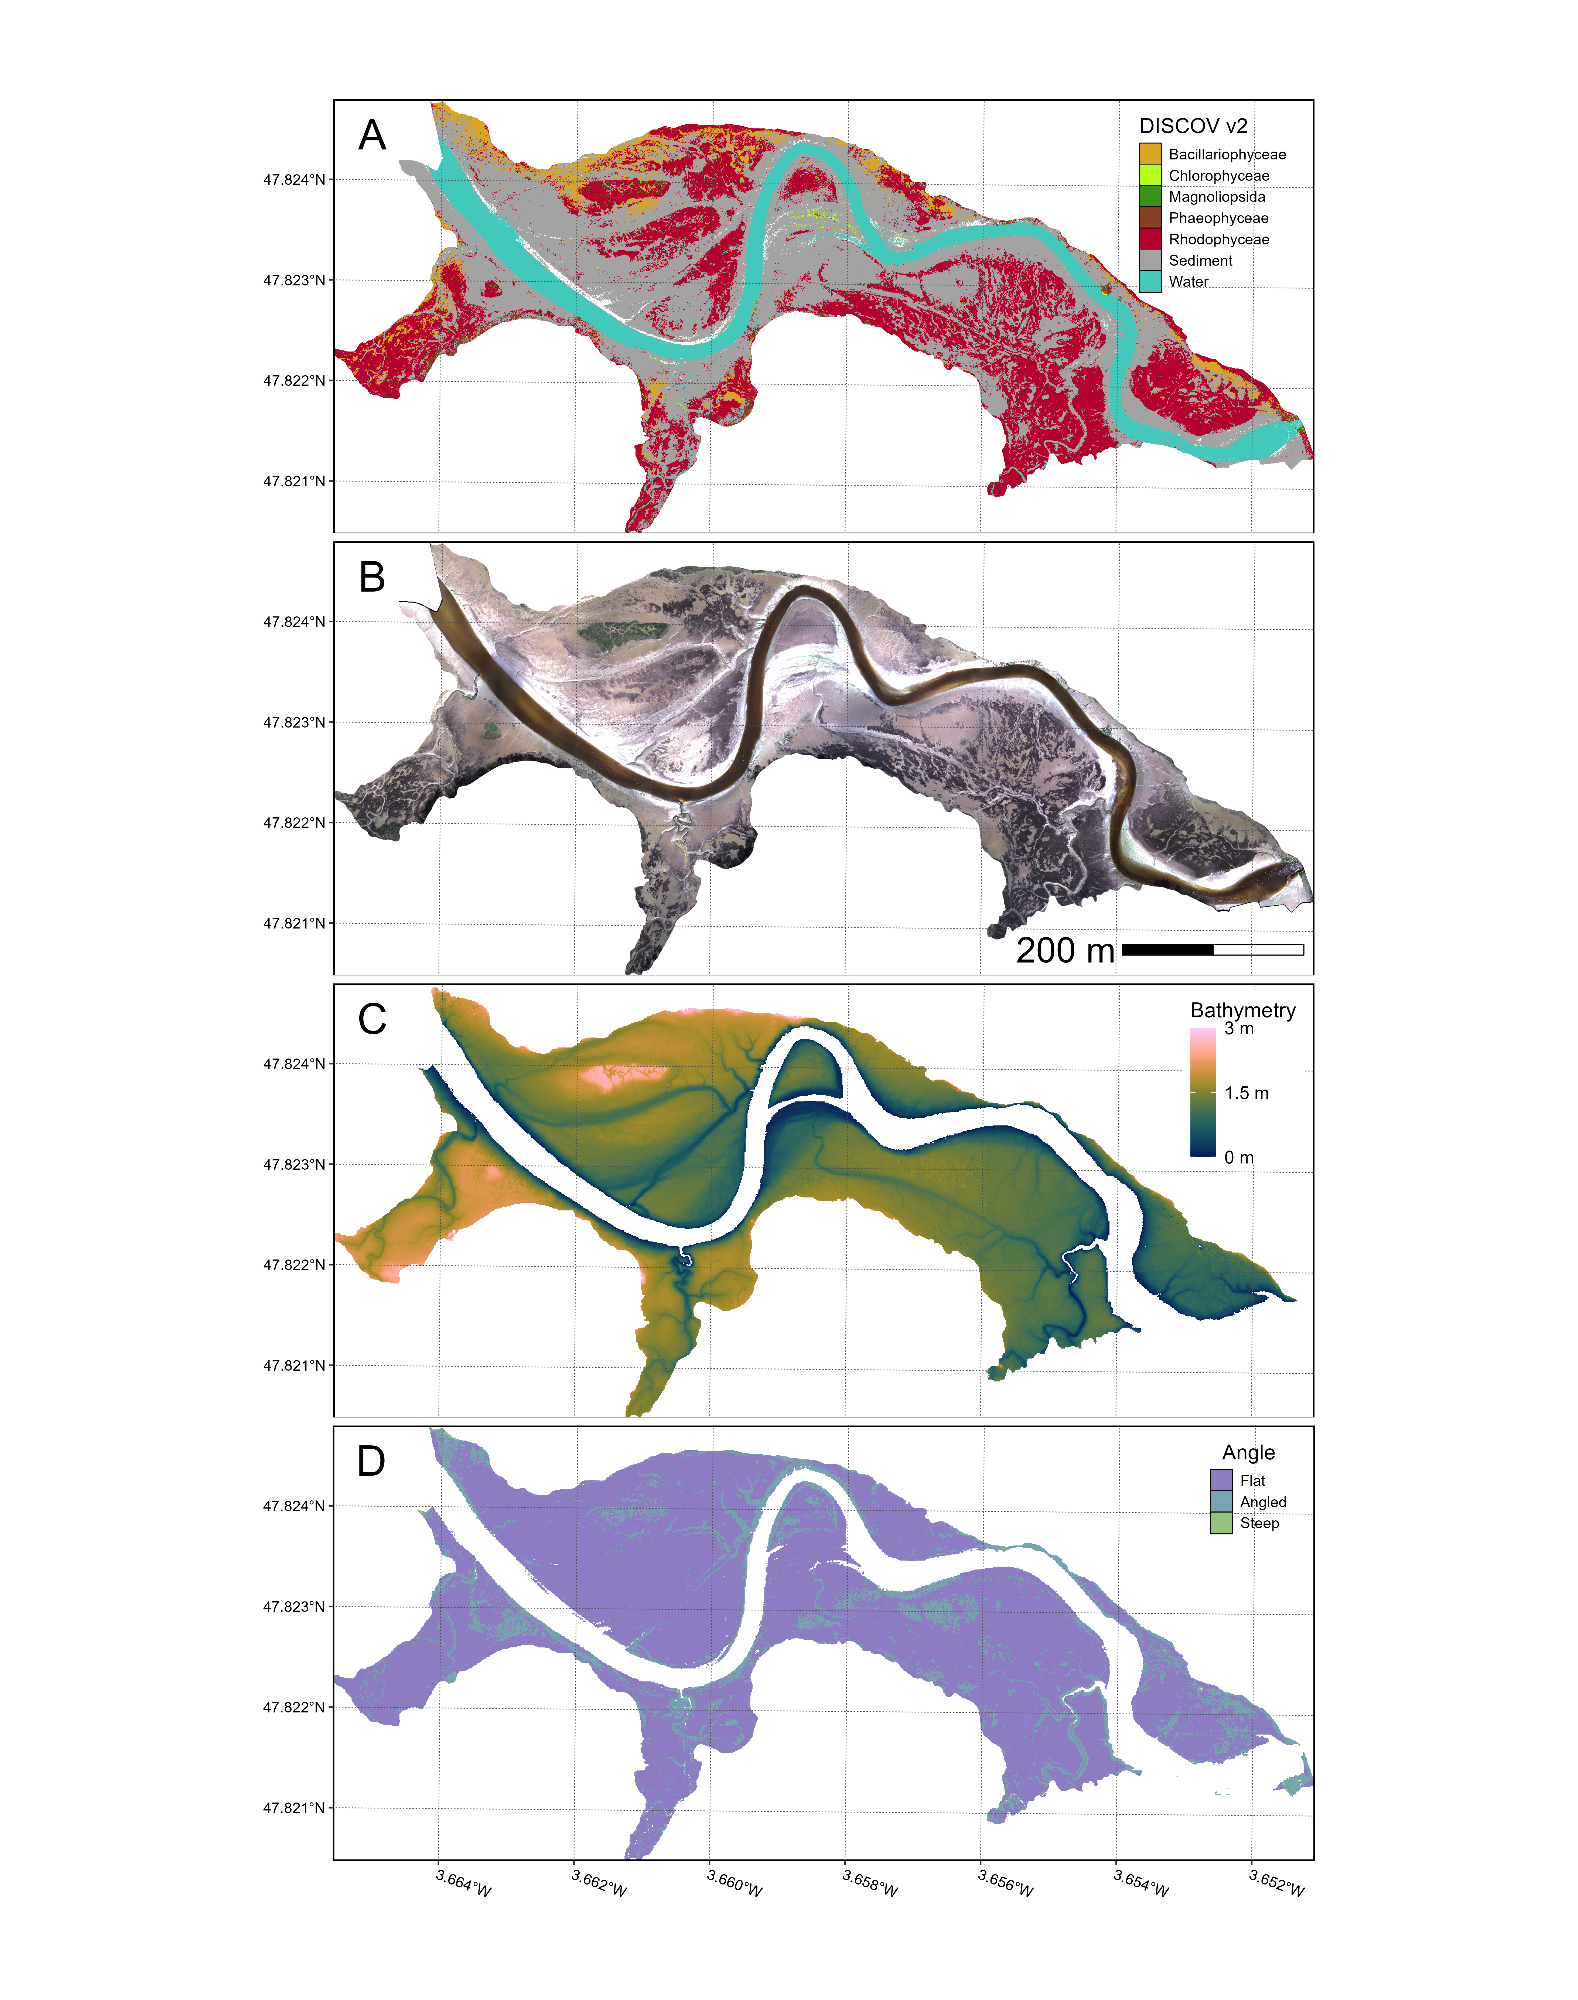

In [ ]:
knitr::include_graphics("./Figures/Low_res/Belon_maps.png")

In [ ]:
library(tidyverse)
library(Utilities.Package)
library(mgcv)
library(brms)
library(tidybayes)
library(cowplot)


Full_df<-read_csv("Data/Model/FullDF_10timesResample_DEMSlope_PredPercent.csv")

m_Red <- brm(bf(Pred ~ DEM+Slope_Cat+ (1|Site)),
         data = Full_df, family = Beta(), cores = 8, iter = 1000,
         warmup = 100, control = list(adapt_delta = 0.9999),
         save_pars = save_pars(latent = TRUE),
         file = "Data/Model/Pred_Beta_agg_1000_DEM_SlopeCat_reSite_resampled")


NewData_1<-expand_grid(DEM=seq(min(Full_df$DEM),max(Full_df$DEM),length.out=100),
                       Slope_Cat=factor(c("Flat",
                            "Slope",
                            "Vertical")),
                       Site=unique(Full_df$Site))

NewData1_brms<-NewData_1%>% 
  add_linpred_draws(m_Red, ndraws=2000,seed=123,transform=TRUE)

Total<-NewData1_brms%>% 
  group_by(DEM)%>% 
  summarise(median_qi(.linpred,.width=c(0.89))) %>% 
  expand_grid(Slope_Cat=factor(c("Flat",
                            "Slope",
                            "Vertical")))

# (plot <- NewData1_brms%>% 
#   group_by(DEM,Slope_Cat)%>% 
#   summarise(median_qi(.linpred,.width=c(0.89)))%>%
#   ggplot(aes(x = DEM,y=y)) +
#   geom_ribbon(aes(ymax = ymax,ymin=ymin,color=Slope_Cat),
#               fill = NA,
#               linetype = "dashed") +
#   geom_line(aes(colour=Slope_Cat),
#             linewidth=1)+
#   geom_line(data = Total,aes(x=DEM,y=y),colour="black")+
#   scale_fill_manual(name="Slope",values=c("#8E7CC3","#76A5AF","#93C47D"),
#                     labels=c("Flat",
#                             "Angled",
#                             "Vertical"))+
#   scale_colour_manual(name="Slope",values=c("#8E7CC3","#76A5AF","#93C47D"),
#                     labels=c("Flat",
#                             "Angled",
#                             "Vertical"))+
#   scale_y_continuous(breaks = c(0.1,0.2,0.3,0.4,0.5),
#                      labels = c("10","20","30","40","50"))+
#   labs(x="Bathymetry (m)",y="Intertidal Area Covered\n by Gracilaria vermiculophylla (%)")+
#   facet_wrap(~Slope_Cat,ncol =2)+
#   theme_Bede()+
#   theme(strip.text = element_blank(),
#         legend.position= c(0.75,0.25), 
#         legend.title = element_text(size = 20, margin = margin(b = 20)),
#         legend.text = element_text(size  = 15),
#         legend.key.size = unit(1,"cm"),
#         legend.spacing.y = unit(1, "cm"),
#         axis.text.x = element_text(size = 15),
#         axis.text.y = element_text(size = 15),
#         axis.title.x = element_text(size = 20),
#         axis.title.y = element_text(size = 20), 
#         plot.background = element_rect(fill = "white", color = NA))+
#   guides(fill = guide_legend(nrow = 1),
#          colour = guide_legend(nrow = 1))
#   )

(plot <- NewData1_brms%>% 
  group_by(DEM,Slope_Cat)%>% 
  summarise(median_qi(.linpred,.width=c(0.89)))%>%
  ggplot(aes(x = DEM,y=y)) +
  geom_ribbon(aes(ymax = ymax,ymin=ymin,color=Slope_Cat),
              fill = NA,
              linetype = "dashed") +
  geom_line(aes(colour=Slope_Cat),
            linewidth=1)+
  geom_line(data = Total,aes(x=DEM,y=y),colour="black")+
  scale_fill_manual(name="Slope",values=c("#8E7CC3","#76A5AF","#93C47D"),
                    labels=c("Flat",
                            "Angled",
                            "Steep"))+
  scale_colour_manual(name="Slope",values=c("#8E7CC3","#76A5AF","#93C47D"),
                    labels=c("Flat",
                            "Angled",
                            "Steep"))+
  scale_y_continuous(breaks = c(0.1,0.2,0.3,0.4,0.5),
                     labels = c("10","20","30","40","50"))+
  labs(x="Bathymetry (m)",y="Intertidal Area Covered\n by Gracilaria vermiculophylla (%)")+
  facet_wrap(~Slope_Cat,ncol =3)+
  theme_Bede()+
  theme(strip.text = element_blank(),
        # legend.title = element_text(size = 17),
        legend.title = element_blank(),
        legend.text = element_text(size  = 15),
        legend.key.spacing.x = unit(5,"cm"),
        legend.position = "top",
        legend.key.size = unit(0.7,"cm"),
        # legend.key.spacing.y = unit(-10, "cm"),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        axis.title.x = element_text(size = 17),
        axis.title.y = element_text(size = 17), 
        plot.background = element_rect(fill = "white", color = NA))
  )

NewData1_brms%>% 
  group_by(DEM,Slope_Cat)%>% 
  summarise(median_qi(.linpred,.width=c(0.89))) %>% 
  group_by(Slope_Cat) %>% 
  reframe(min = min(y),
          max = max(y))

ggsave("Paper/Figures/High_res/GAM_slope_cover.png", width = 10, height = 5, dpi = 400)
ggsave("Paper/Figures/Low_res/GAM_slope_cover.png", width = 10, height = 5, dpi = 200)

Overall, the percent cover of *Gracilaria vermiculophylla* increases with bathymetry, as shown by the general relationship (@fig-Gam_Slope, black line), which rises from approximately 16% at the lowest elevation to about 30% at the highest elevation. This indicates a consistent positive association between bathymetry and algal cover.

When accounting for slope, the flatter the slope, the higher the percent cover of *G. vermiculophylla*. For flat slopes, the cover ranges from approximately 20% at the lowest elevation to nearly 38% at the highest elevation. In contrast, for angled slopes, the increase is less pronounced, ranging from around 16% to 32%. On steep slopes, the cover is the lowest, starting at about 15% and rising only slightly above 30% at the highest elevation (@fig-Gam_Slope). This demonstrates that slope modifies the relationship, with flatter slopes supporting a greater percent cover of the algae.

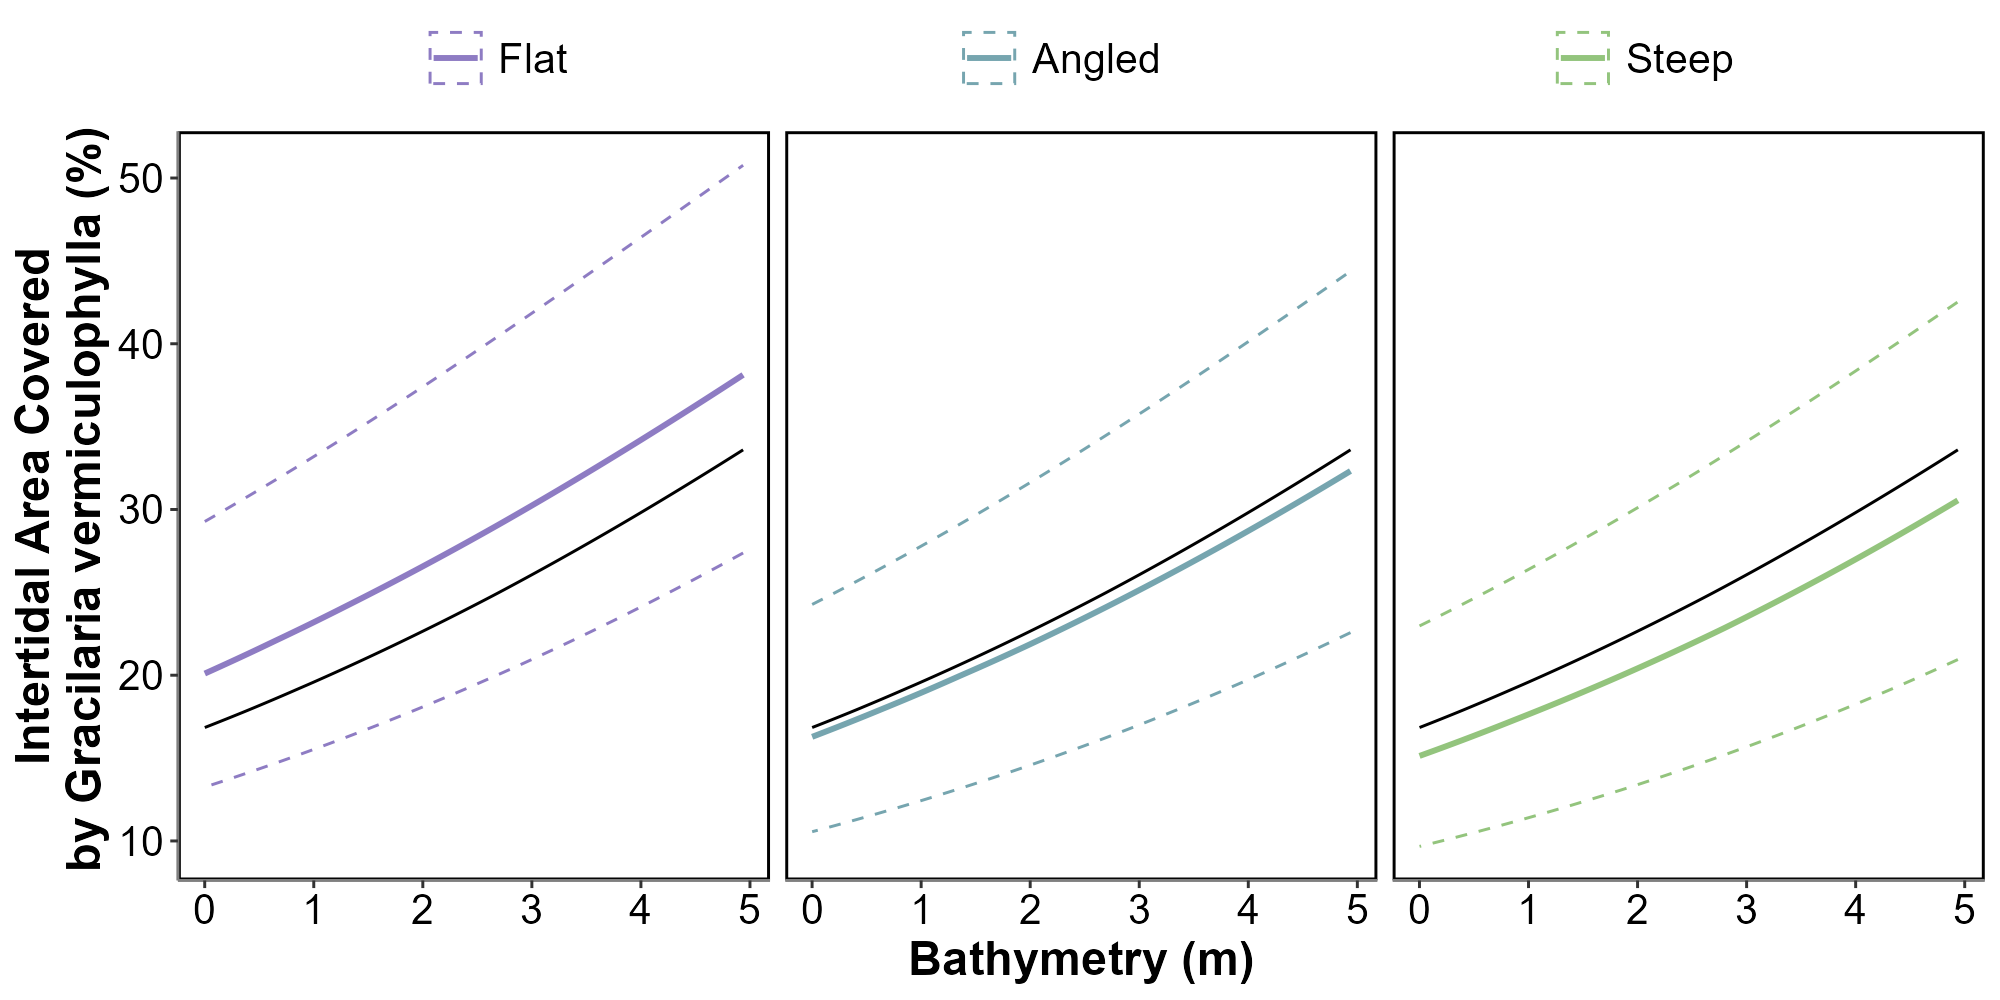

In [ ]:
knitr::include_graphics("./Figures/Low_res/GAM_slope_cover.png")

# Discussion

## Drone mapping *G. vermiculophylla* with machine learning

In this study, we produced the first spatial distribution maps of the invasive red alga *Gracilaria vermiculophylla* using a multispectral drone survey conducted at low tide in Atlantic estuaries representing varied environmental conditions. In southern Brittany, the species formed monospecific mats, while in the Cantabrian region of Spain, it was intermixed with other intertidal vegetation. Distinguishing among these vegetation types was a key prerequisite for the analysis.

To achieve this, we adapted the deep learning-based classification model DISCOV \[@rs16234383\], initially developed to discriminate seagrass from green macroalgae. Although the original model included Rhodophyceae as a class, this group constituted less than 3% of its training dataset. In contrast, the updated model presented here was trained on a dataset in which *G. vermiculophylla* covered 26 % of approximately one million pixels. This improved dataset allowed the model to achieve an accuracy of 91.1 %.

Rhodophytes possess unique phycobilin pigments, enabling their spectral distinction from other macroalgal groups \[@rs14020346; @olmedo2020far; @rs11060704\]. Even with the ten-band multispectral sensor used in our study, it remained feasible to discriminate the major classes of intertidal macrophytes \[@roman2021using; @rs16234383; @davies2023multi\]. However, the model identifies *G. vermiculophylla* at the class level (Rhodophyceae) rather than at the species level. Although hyperspectral approaches may allow finer taxonomic resolution \[@rs14020346; @olmedo2020far\], it is unlikely that Gracilaria species can be precisely distinguished using standard multispectral sensors.

Ecological factors also aid in differentiating *G. vermiculophylla*. Unlike many other macroalgae that require hard substrates, *G. vermiculophylla* establishes itself on soft-bottom sediments. In fact, it is commonly found on mudflats, anchoring its thalli in the top 10 cm of mud \[@surget2017processus\], and inhabits the upper intertidal zone—an unusual trait for a Rhodophyte \[@abreu2011nitrogen; @davoult2017multiple\]. By reliably detecting *G. vermiculophylla* in these soft-substrate, upper intertidal habitats, our method provides a framework for identifying environmental conditions that favor its spread, potentially offering managers early-warning indicators to control its expansion before it reaches nuisance levels. Thus, combining spectral data with sediment characteristics provides a strong indicator of *G. vermiculophylla* presence in European Atlantic estuaries, complementing the physical variables already used in species distribution modeling \[@jmse11020367\].

In addition, the scalability of drone-based surveying facilitates repeat mapping to detect temporal shifts in the distribution and abundance of *G. vermiculophylla.* Such continuous monitoring could capture seasonal patterns of colonization, allowing researchers and environmental managers to evaluate the effectiveness of mitigation measures, track long-term ecological impacts, and anticipate future shifts in habitat suitability under changing climate conditions.

## *G. vermiculophylla* spatial distribution and mudflat topography

The spatial distribution of *Gracilaria vermiculophylla* across intertidal zones reveals a distinct relationship with mudflat topography, which significantly influences algal density and coverage. Our results show that higher elevations within the intertidal zone support greater densities of *G. vermiculophylla*. A pattern that aligns with findings by @thomsen2009distribution, where elevated areas provided optimal conditions for algal survival.*Gracilaria vermiculophylla* demonstrates remarkable physiological plasticity, enabling it to tolerate a broad spectrum of environmental conditions, including temperature fluctuations \[@sotka2018combining\], nutrient variability \[@abreu2011nitrogen\], and a wide range of salinities \[@weinberger2008invasive\]. Its capacity for sustained growth under low salinity conditions \[@rueness2005life; @nyberg2007introduced\] underpins its successful establishment and persistence within polyhaline and mesohaline estuarine environments. A strong constrain however for the implentation of the algae is the hydrodynamism. Unlike seagrasses, another type of marine plant that can also colonize soft sediment, which possess rhizomes that provide robust anchorage, *Gracilaria vermiculophylla* lacks such specialized structures. Its attachment to the substrate relies solely on its buried thalli, which embed into the upper layers of soft sediment. This mode of anchorage renders the alga particularly vulnerable to high hydrodynamic conditions, as it lacks the structural stability needed to withstand strong currents or wave action. To partially bury its thalli into the sediment, *Gracilaria vermiculophylla* requires areas with high sedimentation rates. These conditions are typically found in the upper regions of estuarine systems or in proximity to other macrophytes, such as *Sporobolus* spp. (commonly known as small cordgrass), which reduce current velocity and promote sediment deposition \[@mudd2010does\]. This observation aligns with the findings illustrated in @fig-HistoricalMap, which show that one of the first areas colonized by *G. vermiculophylla* in 1992 in the Bélon estuary, France, was located near a salt marsh patch.  
As a result, *Gracilaria vermiculophylla* compensates for its vulnerability to hydrodynamic forces by forming dense mats, which enhance its stability and facilitate its persistence and proliferation in intertidal and estuarine environments with low to moderate hydrodynamic conditions \[@surget2017processus\].

The negative relationship between slope steepness and the density of *Gracilaria vermiculophylla* can be explained by the physical and ecological characteristics of steeper mudflat areas. Steeper slopes are typically associated with higher rates of water runoff during tidal exchanges, resulting in stronger hydrodynamic forces. These forces can lead to increased sediment erosion, reduced sedimentation, and less stable substrate conditions, which are unfavorable for *G. vermiculophylla* to anchor its thalli effectively \[@besterman2021predicting\]. Furthermore, steeper slopes may limit the retention of organic matter and nutrients, reducing the availability of essential resources needed for algal growth. In contrast, flatter areas within the intertidal zone are more likely to accumulate fine sediments and retain water for longer durations during low tides, creating a more stable and nutrient-rich environment conducive to *G. vermiculophylla* proliferation. Additionally, these conditions may favor the formation of dense algal mats, which further stabilize the sediment and promote growth.

## Spatio-temporal monitoring of invasive macroalgae

Accurate, high-resolution maps of invasive or alien species are extremely scarce \[@fourcade2014mapping ; @vilizzi2021global\], yet they enable in-depth evaluations of these species’ ecology, temporal dynamics, and niche behavior in relation to their environment. In this study, using individual flights over monospecific algal mats, we quantified how this invasive alga associates with local mudflat topography, demonstrating that its distribution is closely tied to specific topographical features, such as elevation and slope gradients. This relationship reveals how physical features of the mudflat can influence the extent and density of *Gracilaria vermiculophylla* mats. Understanding the drivers of the spatial distribution of the algae helps to anticipate the future development of this species and identify areas vulnerable to its invasion. Repeated monitoring of this type can further reveal phenological patterns, invasion dynamics, and local conspecific biological interactions—such as co-occurrence, displacement, or avoidance \[@godoy2009different ; @arim2006spread\].

Remote sensing using multispectral drone mapping can provide high-resolution, spatially explicit data, but it must be combined with repeated, in situ field measurements to maximize its potential \[@chadwick2020integrating ; @zoffoli2023remote\]. As noted, temporal repetition makes it possible to assess dynamic processes, and integrating these mapping approaches with in situ analyses of local infauna, carbon cycling, riverine inputs, and sedimentology would yield valuable insights for local managers. Such an integrated approach could help determine how the invasive algae affects the local ecosystem and, more broadly, forecast its potential impact on other estuarine environments facing similar invasion events. This holistic approach can guide strategic interventions aimed at mitigating the alga’s spread, maintaining ecological balance, and protecting native biodiversity, ensuring that management efforts are informed by accurate, timely, and spatially explicit data.

Invasive species like *Gracilaria vermiculophylla* and *Rugulopteryx okamurae* can be identified using drones equipped with multispectral sensors, taking advantage of the characteristic reflectance of rhodophytes \[@barille2025variability ; @rs15143674\]. However, while RGB sensors on readily available commercial drones can be used to perform accurate scene classification, their effectiveness for mapping invasive species has not yet been demonstrated \[@cheng2017remote ; @kazakeviciute2020assessment\]. These drones are easy to deploy, can cover large areas when flying at speeds of 15 m s<sup>-1</sup> at an altitude of 120 m, and still maintain sufficient overlap between images to support photogrammetric reconstruction. Expanding these methodologies to RGB-based detection would significantly lower barriers to entry, allowing local stakeholders with limited resources to access valuable monitoring tools for early detection and rapid response. A promising avenue for operational applications lies in testing machine learning techniques for coastal habitat mapping using RGB imagery that do not rely on enhanced spectral resolution. Considering the low cost of RGB and multispectral commercial drones, coupled with ongoing advancements in machine learning, drone-based remote sensing has now matured into a practical tool for adoption by environmental authorities in coastal management. Integrating these technologies into routine monitoring protocols can enhance surveillance capabilities, improve understanding of invasive species dynamics, and ultimately contribute to more effective conservation and restoration strategies.

## Timing of the Invasion of Gracilaria vermiculophylla in the Bélon Estuary

The invasive red alga *Gracilaria vermiculophylla* represents a significant example of delayed recognition and documentation in biological invasions. Historical aerial imagery and photo-interpretation analyses from the Bélon Estuary suggest the initial presence of this species in 1976 \[@fig-HistoricalMap\], preceding its first formal description in European waters in 1996 by two decades \[@rueness2005life\]. This lag highlights challenges associated with the detection, monitoring, and reporting of invasive species and their ecological impacts during early colonization.

The appearance of *G. vermiculophylla* in 1976 corresponds with the introduction of the Pacific oyster (Crassostrea gigas) into the estuary, a few years before, between 1971 and 1975, and a potential vector for algal dispersal through aquaculture activities \[@grizel1991introduction ; @rueness2005life\]. After initial establishment, the alga progressively occupied suitable habitats, consistent with theoretical invasion dynamics involving a lag phase followed by rapid spread \[@arim2006spread\]. The establishment of *G. vermiculophylla* likely induced changes in sediment characteristics, trophic interactions, and habitat structure prior to formal recognition \[@bendor2006spatial\]. Such shifts are comparable to documented impacts in similar systems, yet remain difficult to quantify without early monitoring data.

The temporal gap between the first presence and documentation reflects limitations in early surveillance, potentially underestimating ecological and economic impacts during the initial colonization phase. Studies on invasion dynamics demonstrate that early detection is crucial for effective containment and management, particularly before an invasion reaches the exponential spread phase, which complicates control efforts \[@bendor2006spatial ; @arim2006spread\]. In the Bélon Estuary, *G. vermiculophylla* appears to have thrived under ecological conditions favorable to its proliferation enabling the formation of dense mats in about 6 years (between 1976 and 1982; @fig-HistoricalMap). This undocumented growth likely contributed to substantial changes in the estuarine ecosystem.

Remote sensing technologies, including aerial imagery and drone-based multispectral imaging, are proving to be valuable tools for the early detection and monitoring of invasive species. Historical aerial imagery has provided valuable insights into long-term invasion patterns by enabling the retrospective identification of shifts in habitat characteristics. Modern drone-based systems enhance this capacity through high spatial and temporal resolution, enabling the rapid detection of invasive species at early stages of establishment. By capturing detailed data on the spatial distribution and habitat preferences of species such as *G. vermiculophylla*, remote sensing facilitates timely interventions, allowing stakeholders to take rapid measures to limit the invasion. Integrating these tools into routine monitoring programs offers a scalable and efficient means to track invasive species dynamics and inform targeted management strategies.

# Conclusion

# References